In [1]:
%pylab inline
import pandas as pd
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
root = tk.Tk()
root.withdraw()
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('D:/KSP/Study/Houston/Projects/Reading Experiment/Reading Code/reading_analysis/expt2/Dataframe')
file_name_saccade = open('Saccade summary MNH DF 6 Subjects.txt','r')
file_name_fixation=open('Fixation summary MNH DF 6 Subjects.txt','r')
file_name_accuracy=open('Accuracy_data.txt','r')
saccade_dataframe=pd.read_csv(file_name_saccade,delimiter=',')
fixation_dataframe=pd.read_csv(file_name_fixation,delimiter=',')
accuracy_dataframe=pd.read_csv(file_name_accuracy,delimiter='\t')

saccade_dataframe["fwd_per_word"]=saccade_dataframe.Number_of_forward_Saccades/saccade_dataframe.Num_Words
saccade_dataframe["back_per_word"]=saccade_dataframe.Number_of_backward_Saccades/saccade_dataframe.Num_Words
fixation_dataframe["wpm"]=fixation_dataframe.Num_Words/fixation_dataframe.Trial_Duration*60000
fixation_dataframe["fixations_per_word"]=fixation_dataframe.Num_Fixations/fixation_dataframe.Num_Words

saccade_dataframe["fwd_per_word"]=saccade_dataframe.Number_of_forward_Saccades/saccade_dataframe.Num_Words
saccade_dataframe["back_per_word"]=saccade_dataframe.Number_of_backward_Saccades/saccade_dataframe.Num_Words
saccade_dataframe["saccades_per_word"]=saccade_dataframe.Number_of_saccades/saccade_dataframe.Num_Words
#accuracy_dataframe["accuracy_percent"]=(1-accuracy_dataframe.Num_Errors_Trial)*100
fixation_dataframe["wpm"]=fixation_dataframe.Num_Words/fixation_dataframe.Trial_Duration*60000

#fixation_dataframe.loc[fixation_dataframe.PRL_Position=='Foveal','Presentation_Mode']='no highlight'

#accuracy_dataframe.loc[accuracy_dataframe.Presentation_Mode=='Foveal','PRL_Position']='Foveal'

#fixation_dataframe['Presentation_Mode_fake']=fixation_dataframe.Presentation_Mode

#fixation_dataframe.loc[fixation_dataframe.PRL_Position=='Foveal','Presentation_Mode_fake']='with highlight'

def row_to_code(x):
    return "%s_%s_T%s_%s"%(x.Subject_ID,x.Session_No,x.Trial_No,x.PRL_Position.lower())

def filename_to_code(x):
    return "%s_%s"%(x.Filename[:-4],x.PRL_Position.lower())

accuracy_dataframe["Code"]=(accuracy_dataframe.apply(row_to_code,1)).astype(str)
fixation_dataframe["Code"]=fixation_dataframe.apply(filename_to_code,1).astype(str)


merged_df=pd.merge(fixation_dataframe, accuracy_dataframe, left_on='Code', right_on='Code')
merged_df["accuracy_percent"]=(merged_df.Num_Words-merged_df.Num_Errors_Trial)/merged_df.Num_Words*100


prl_sequence=[['right','left','inferior'],
          ['inferior','left','right'],
          ['inferior','right','left'],
          ['left','right','inferior'],
          ['left','inferior','right'],
          ['right','inferior','left']
         ]

highlight_sequence=[ ['no','with','with','no','with','no'],  
            ['with', 'no','no','with','no','with'],
            ['no','with','with','no','with','no'],  
            ['with', 'no','with','no','with','no'],
            ['no','with','with','no','with','no',],  
            ['with', 'no','no','with','no','with'],
           ]
          
          
colors_prl={'right':'g','inferior':'orange','left':'red'}
plot_title={'right':'Pseudo-PRL Right','inferior':'Pseudo-PRL Inferior','left':'Pseudo-PRL Left'}
markers_highlight={'with':'o', 'no':'.'}
label={'with':'With Highlight','no':'No Highlight'}

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Checking Data Consistency
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
#overall_duration_summary=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],'Data_length':[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j] 
        data_length=len(fixation_dataframe.query("(Training==True) & (Subject_ID==@subject_id) & (PRL_Position==@prl_pos)")['wpm'])
        print(data_length)

60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60


C:\Users\krish\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


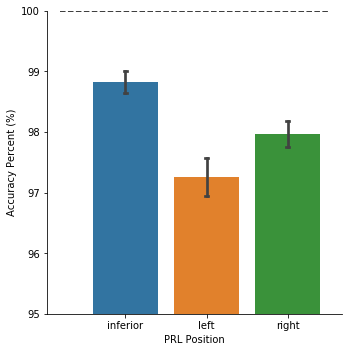

In [3]:
sns.factorplot(x='PRL_Position_x', y='accuracy_percent' ,data=merged_df, kind='bar',capsize=0.04,legend=False)
plt.ylim(95,100)
plt.ylabel('Accuracy Percent (%)')
plt.xlabel('PRL Position')
plt.plot( [-0.8,2.5], [100,100], 'k--' )
#plt.legend( loc='upper right', labels=['No Highlight', 'With Highlight'])
#plt.legend(title='Presentation Mode')

savefig('Performance.tif',bbox_inches='tight')

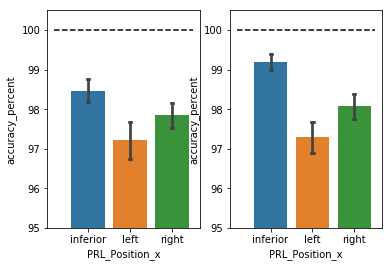

In [4]:
filtered_df=merged_df.query("Presentation_Mode_x=='no highlight'")
plt.subplot(1,2,1)
sns.barplot(x="PRL_Position_x",y="accuracy_percent",data=filtered_df,capsize=.05)
plt.ylim(95,100.5)
plt.plot( [-0.8,2.5], [100,100], 'k--' )

filtered_df=merged_df.query("Presentation_Mode_x=='with highlight'")
plt.subplot(1,2,2)
sns.barplot(x="PRL_Position_x",y="accuracy_percent",data=filtered_df,capsize=.05)
plt.ylim(95,100.5)

plt.plot( [-0.8,2.5], [100,100], 'k--' )

C:\Users\krish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


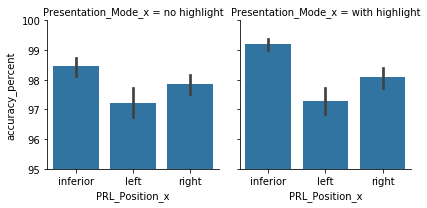

In [5]:
g = sns.FacetGrid(merged_df, col='Presentation_Mode_x')
g.map(sns.barplot,"PRL_Position_x", "accuracy_percent")
plt.ylim(95,100)
plt.show()

C:\Users\krish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


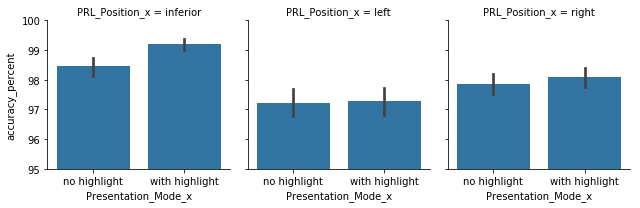

In [6]:
g = sns.FacetGrid(merged_df, col='PRL_Position_x')
g.map(sns.barplot,"Presentation_Mode_x", "accuracy_percent")
plt.ylim(95,100)
plt.show()


In [7]:
merged_df.query('PRL_Position_x=="right"& Presentation_Mode_x=="no highlight"')['Num_Errors_Trial'].mean()

1.3125

In [8]:
saccade_dataframe.PRL_Position.unique()

array(['inferior', 'left', 'Foveal', 'right'], dtype=object)

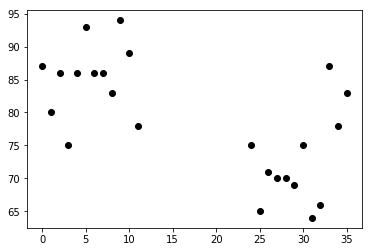

In [9]:
df_foveal=fixation_dataframe.query("(Subject_ID=='S02') &(PRL_Position=='Foveal') ")
#plt.plot(fixation_dataframe.query("(Training==True) & (Subject_ID=='S04') &(PRL_Position=='left') & (Presentation_Mode=='with highlight')")['Num_Fixations'],'o-')
x_axis=df_foveal['Trial_No']
y=df_foveal['Num_Fixations']
plt.plot(x_axis,y,color='k',marker='o',ls='')

In [10]:

pct_improve=np.zeros(4)
for nsub,asub in enumerate([0,1,3,4]):
        first_prl=prl_sequence[asub][0]
        first_highlight=highlight_sequence[asub][0]
        second_highlight=highlight_sequence[asub][1]
        print(asub,first_prl,first_highlight)
        
        avg_foveal=fixation_dataframe.query("(Subject_ID=='S%02d') &(PRL_Position=='Foveal') "%(asub+1)).mean()['Num_Fixations']
        
        avg_first10=fixation_dataframe.query("(Training==True) & (Subject_ID=='S%02d') &(PRL_Position=='%s') &"
                                 "(Presentation_Mode=='%s highlight')&"
                                 "(Trial_No < 10)"%(asub+1,first_prl,first_highlight)).Num_Fixations.mean()
    
        avg_last10=fixation_dataframe.query("(Training==True) & (Subject_ID=='S%02d') &(PRL_Position=='%s') &"
                                 "(Presentation_Mode=='%s highlight')&"
                                 "(Trial_No > 50)"%(asub+1,first_prl,second_highlight)).Num_Fixations.mean()

        print (avg_first10,avg_last10,(avg_first10-avg_last10)/avg_first10,avg_foveal)
        
        pct_improve[nsub]=(avg_first10-avg_last10)/avg_first10

0 right no
183.1 111.11111111111111 0.3931670611080769 102.5
1 inferior with
176.4 96.88888888888889 0.45074326026706985 79.0
3 left with
139.4 120.0 0.139167862266858 74.54166666666667
4 left no
218.3 115.88888888888889 0.46913014709624884 68.29166666666667


(50, 300)

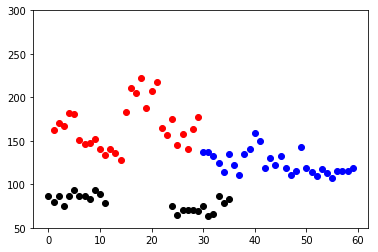

In [11]:
df_foveal=fixation_dataframe.query("(Subject_ID=='S02') &(PRL_Position=='Foveal') ")
#plt.plot(fixation_dataframe.query("(Training==True) & (Subject_ID=='S04') &(PRL_Position=='left') & (Presentation_Mode=='with highlight')")['Num_Fixations'],'o-')
x_axis=df_foveal['Trial_No']
y=df_foveal['Num_Fixations']
plt.plot(x_axis,y,color='k',marker='o',ls='')

#
df_no_h=fixation_dataframe.query("(Training==True) & (Subject_ID=='S01') &(PRL_Position=='left') & (Presentation_Mode=='no highlight')")
#plt.plot(fixation_dataframe.query("(Training==True) & (Subject_ID=='S04') &(PRL_Position=='left') & (Presentation_Mode=='with highlight')")['Num_Fixations'],'o-')
df_yes_h=fixation_dataframe.query("(Training==True) & (Subject_ID=='S01') &(PRL_Position=='left') & (Presentation_Mode=='with highlight')")
x_axis=df_no_h['Trial_No']
y=df_no_h['Num_Fixations']
plt.plot(x_axis,y,color='b',marker='o',ls='')
x_axis=df_yes_h['Trial_No']
y=df_yes_h['Num_Fixations']
plt.plot(x_axis,y,color='r',marker='o',ls='')
plt.ylim(50,300)

In [12]:
# Results:
np.mean(pct_improve), np.std(pct_improve)

(0.3630520826845634, 0.13226238548112304)

In [13]:
# Result. Linear increase from baseline inf:33% more
saccade_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()['Number_of_backward_Saccades']

PRL_Position
Foveal      14.263889
inferior    19.045139
left        34.868056
right       48.826389
Name: Number_of_backward_Saccades, dtype: float64

In [14]:
saccade_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()['Number_of_forward_Saccades']

PRL_Position
Foveal      64.256944
inferior    79.802083
left        98.333333
right       79.631944
Name: Number_of_forward_Saccades, dtype: float64

In [15]:
# TIMES FOveal
fixation_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()['Mean_Fixation_Duration']

PRL_Position
Foveal      233.044722
inferior    317.500009
left        322.076983
right       316.934802
Name: Mean_Fixation_Duration, dtype: float64

In [16]:
fixation_dataframe.query("Training==False & PRL_Position=='foveal' & Subject_ID=='S01'")

Empty DataFrame
Columns: [Unnamed: 0, Filename, Subject_ID, Session_No, Trial_No, Training, Training_Trial_Number, PRL_Position, Presentation_Mode, Mean_Fixation_Duration, SD_Fixation_Duration, Num_Fixations, Num_Words, Trial_Duration, wpm, fixations_per_word, Code]
Index: []

C:\Users\krish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'PRL Position: foveal')

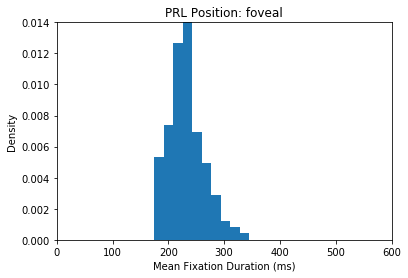

In [17]:
plt.hist(fixation_dataframe.query("Training==False & PRL_Position=='Foveal'")['Mean_Fixation_Duration'],normed=True)#,bins=[50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,500,600])
plt.xlabel('Mean Fixation Duration (ms)')
plt.ylabel('Density')
plt.ylim(0,0.014)
plt.xlim(0,600)
plt.title('PRL Position: foveal')

#savefig('Fixation Duration foveal.pdf',bbox_inches='tight')

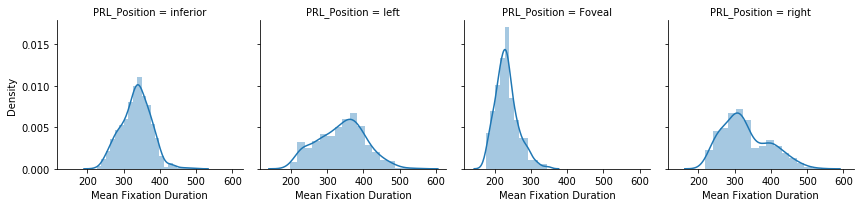

In [18]:
import seaborn as sns
g = sns.FacetGrid(fixation_dataframe, col='PRL_Position',col_wrap=4)
g.map(sns.distplot, "Mean_Fixation_Duration").set_axis_labels('Mean Fixation Duration', 'Density')
plt.show()




Text(0.5, 1.0, 'Mean Fixation Duration & PRL Position')

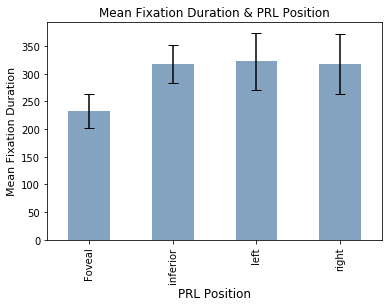

In [19]:
variable='Mean_Fixation_Duration'
fixation_duration_data=fixation_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()[variable]
error_bar=fixation_dataframe.query("(Training==False)").groupby(['PRL_Position'])[variable].std()

fixation_duration_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.ylabel('Mean Fixation Duration',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Mean Fixation Duration & PRL Position')


#savefig('Fixation Duration Bar Graph.pdf',bbox_inches='tight')

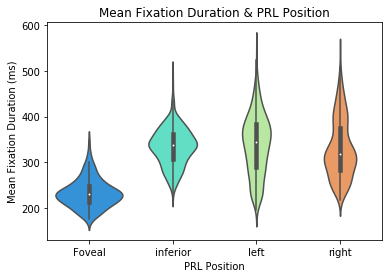

In [20]:
sns.violinplot(x="PRL_Position", y="Mean_Fixation_Duration", data=fixation_dataframe,palette='rainbow',order=['Foveal','inferior','left','right'])
#plt.ylim(0,3000)
plt.xlabel('PRL Position')
plt.ylabel('Mean Fixation Duration (ms)')
plt.title('Mean Fixation Duration & PRL Position')
savefig('Mean Fixation Duration Violin Plot.tif',bbox_inches='tight')

In [21]:
# More than or TIMES
fixation_dataframe.query("(Training==False)").groupby(['PRL_Position']).mean()['Num_Fixations']

PRL_Position
Foveal       78.826389
inferior    101.805556
left        132.024306
right       130.465278
Name: Num_Fixations, dtype: float64

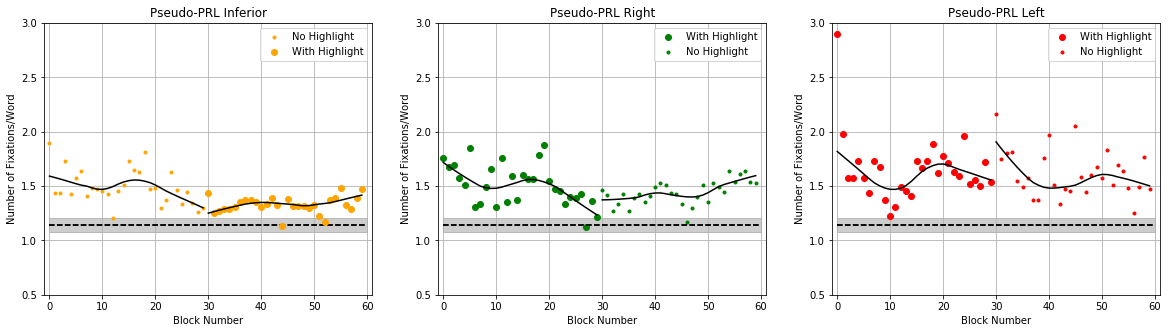

In [22]:
import statsmodels.api as sm
outcome='fwd_per_word'

plt.figure(figsize=(20,5))
nsub=0
asub=2
#for nsub,asub in enumerate([0,1,3,4]):
for n_prl,prl_pos in enumerate(prl_sequence[asub]):
    prl=prl_sequence[asub][n_prl]

    df_foveal=saccade_dataframe.query("(Subject_ID=='S%02d') & (PRL_Position=='Foveal')"%(asub+1))
    foveal_mean=df_foveal[outcome].mean()
    foveal_std=df_foveal[outcome].std()

    plt.subplot(1,3,3*nsub+n_prl+1)
    #plt.text(50,400,"S%02d"%(asub+1),size=18)
    for highlight_cond in [0,1]:
        plt.fill_between( [0,60], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                         [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )
        plt.plot( [0,60], [foveal_mean,foveal_mean], 'k--' )

        highlight_which=highlight_sequence[nsub][n_prl*2+highlight_cond] # each PRL has two highlight conditions trained


        df_hicond=saccade_dataframe.query("(Training==True) & (Subject_ID=='S%02d')"
                    "&(PRL_Position=='%s') & (Presentation_Mode=='%s highlight')"%(asub+1,prl,highlight_which))
        lowess = sm.nonparametric.lowess
        x=df_hicond['Trial_No']
        y=df_hicond[outcome]
        plt.plot(x,y,ls='',color=colors_prl[prl_pos],marker=markers_highlight[highlight_which],label=label[highlight_which])
        z = lowess(y, x, frac=1./2)
        plt.plot(z[:,0], z[:,1], color='k')
        plt.xlabel("Block Number")
        plt.ylabel("Number of Fixations/Word")
        plt.title(plot_title[prl_pos])
        plt.ylim(.5,7)
        plt.xlim(-1,61 ) # So we can fully see first and last point
        plt.grid(True)
        plt.ylim(0.5,3)
        #plt.subplots_adjust(hspace=.3,wspace=0.2)#adjusts the spacing between each of the subplots
        plt.legend()
        #Needed when file needs to be saved
        #savefig('Training_Num_Fixations_S05.pdf',bbox_inches='tight')
        #print asub+1,prl,highlight_which,len(df_hicond)

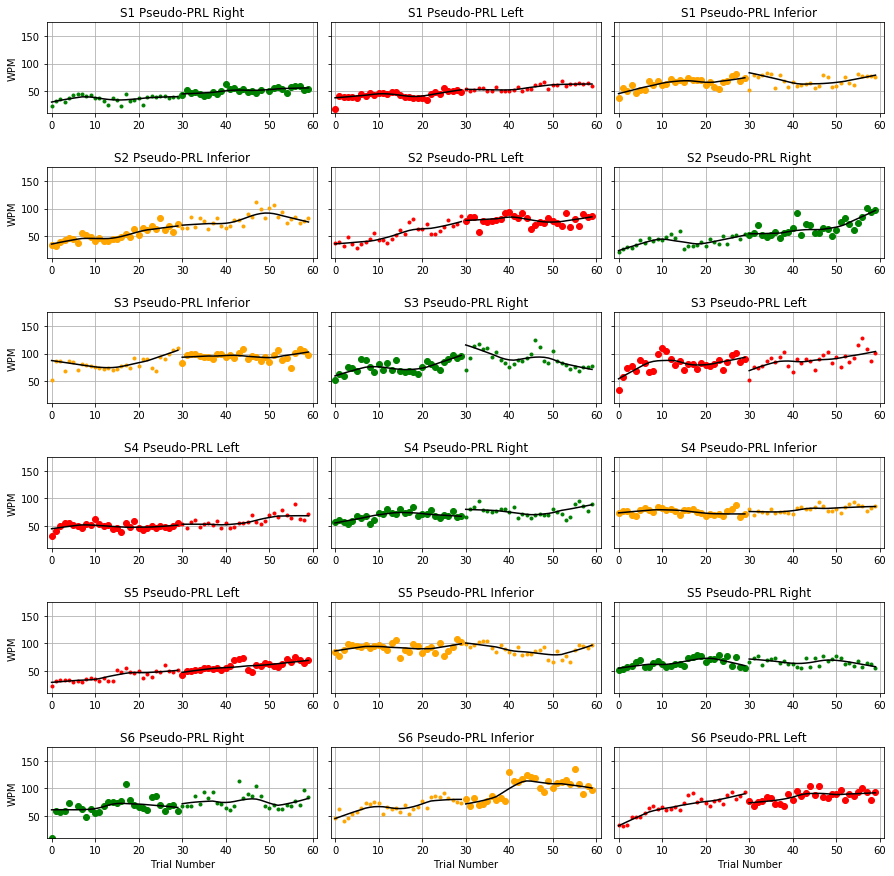

In [23]:
outcome='wpm'
#outcome='fixations_per_word'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJIAAAFNCAYAAABbvUVCAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xl8U1X+//HXp6VlESzigiICMi6IgGAFW0BsKW6ooIg6WAHXzowywIiMC8sgWHVmGEX0p44Li1jBBXFBXGZKCypRBAEZwPm6teCgCArIIq3Q8/sjaS2lTdM2aZL2/Xw88kjuzc25n5NgPvaTc88x5xwiIiIiIiIiIiKViQl3ACIiIiIiIiIiEh1USBIRERERERERkYCokCQiIiIiIiIiIgFRIUlERERERERERAKiQpKIiIiIiIiIiAREhSQREREREREREQmICklSZ5lZOzNzZtYg3LEEi5ldbmabzGy3mXWrxuvvNrOnQxGbiEhdUVfyhy9XtA/wWGdmJ4U6JhGRuqiu5I2KmNkfzGyLL68cGe54JPxUSJKQMbM8M/vZ94WzxcxmmlnTcMcViFLJYLfvlmdmd5Z63pnZHt9z/zOzB80sttTzuWZ2UwDnSTGzb6oQ2lRghHOuqXNuVdV6Bc65+5xzlcYlIhJOyh8B548iXzu7zOy/ZnZ96WN8ueKrIPTpOjN7v6btiIiEivJGSP7uKH5dHPAgcL4vr/ygHx9EhSQJtUudc02BM4HuwPgwx1NVzX3xDwEmmtmFpZ47w/fcucDVwA21EE9bYF11XliTX0jq6q8rIhLRlD8qt9nXzuHAn4CnzOzUmgQtIhLFlDdCoyXQiGr+DSJ1kwpJUiucc/8D3gI6Qcmvm1/5fkX92szSi481sxvMbIOZbTezd8ysrW//IUNGS1fgzSzWzKaa2TYz+wq4uHQMZtbKzF43sx/N7Aszu7kK8Xvwfnl2Kue5L4APgK5VeEvK5evPFDP7wPfevGtmR5lZQzPbDcQCa8zsy1J9mm9mW33v48hSbU0ys5fN7Dkz+wm4zrfvuVLHDDCzdWa2w3fu00o9l2dmd5jZp8AeFZNEJByUPwI6h3POLQJ+BLqUirvkF2MzO9LM3jCzn8zsYzO7t5xRRv3M7HPf+/f/zOs04Akg2fdr+I6axCoiEmrKG1Xn+1tjqpltNO+IrifMrLGZnQL813fYDjNbbGZLfdtrfHnh6mDGItFBhSSpFWZ2AtAfWGVmhwHTgYucc82AnsBq33GXAXcDg4CjgfeAuQGe5mbgEqAbcBYwuMzzc4FvgFa+5+4zs7QAYjcz6wWcDhxyOZmZdQDOAb4IMM7KXANcDxwDxAO3O+cKfL9CgPcXid+YWQzwBrAGOB5IA0ab2QWl2hoIvAw0B7LKxH0K3vdkNN73ehHwhpnFlzpsCN7E2Nw5tz9I/RMRCZjyR+XMLMbMBgBH+Wnr/wF7gGOB4b5bWZfg/RX/DOAq4ALn3Abg94DHd0lD85rEKiISasob1fJX4BS8BaqT8P5tMdE593++WMD790Bf51wf3/YZvrzwQpBjkSigQpKE2qu+Xy/fB5YA9/n2FwGdzKyxc+5b51zxUMnfAfc75zb4Chf3AV2Lfx2oxFXANOfcJufcj8D9xU/4Ekpv4A7n3D7n3GrgaWBoJW1uw/sL79PAnc657FLPfWJme4ANQC7wWAAxBmKmc+7/nHM/Ay9S8S8O3YGjnXOTnXOFvnkwngJ+W+oYj3PuVedcka+90q4G3nTO/cs59wve+Zca402wxab73s+yrxURCTXlj8q18r1HPwMLgNvKmz/PvHNpXAH8xTm31zm3HphdTnsPOOd2OOc2AjkE+RdvEZEQU96oBjMzvIWxPznnfnTO7cL7XvzW/yulPlMhSULtMudcc+dcW+fcLc65n51ze/AWMX4PfGtmb/qq6+CdA+hh815qtQPvl6nhrYpXphWwqdR2fpnnir8YSz9/PJSsbFN8a1PqmKOcc0c4505zzk0vc74zgaa+vpwNHBZAjIH4rtTjvb5zlKctvj8iSr1fd+O9jrnYpvJfCnjfk5L3yDlX5Du+9Hvt7/UiIqGk/FG5zb4RQofj/cW9bwXHHQ004OA+lvf9Hmj+ERGJRMob1XM00ARYWeq9eNu3X6RcKiRJWDjn3nHOnQccB3yGdyQNeL+Qf+dLAsW3xs65ZXiH5IP3i67YsaUefwucUGq79BfzZqCFmTUr8/z/fPE0LXXbWIV+OOfci4AHmBjo64JkE/B1mfeqmXOuf+kQ/bx+M94ECpT8GnECvvckgNeLiNQ65Y9y2yoA7gA6+y7VKGsrsB9oXWrfCeUcV+EpahCeiEhYKW9Uahveka2nl3ofEtyv02qIHEKFJKl1ZtbSvJM8HwYUALuBA76nnwDuMrPTfccmmNmVAM65rXi/gK/1TXB3A/CbUk2/CIw0s9ZmdgRQsmymc24TsAy438wamVkX4EbKzBtUAw8AGWZWOsE08J2r+BYXpHMVWw78ZN4JsRv73pNOZtY9wNe/CFxsZmm+2Mbg/TyWBTlOEZGgUP6omHOuEPgH5fxx4Zw7ALwCTDKzJr5f44dVIcYtQOsyc+iJiEQ85Y1DlTmuEd4fC54CHjKzY3zHHG8Hz7ta1hagfRD6IlFKhSQJhxi8RYvNeIeQngvcAuCcW4B3srd55l1p7D/ARaVeezMwFvgB78RvpYseTwHv4J18+hO8/9Nc2hCgne+8C/DOFfGvYHTIObcW77XYY0vtfhxvdb/4NjMY5yp1zgPApXjnsPga768JTwMJAb7+v8C1wCO+116Kd9nUwmDGKSISRMof/s0A2pjZpeU8NwJvfvgOmIN3ItiCANtdjHcFoe/MbFuArxERiQTKGwc7vsxxP+MtkN2BdwLvD33vxb+BU/2EMQmY7bsU7qpqd0ailjmn0coiIiIi9YmZ/RU41jlX3uptIiIiIhXSiCQRERGROs7MOphZF/PqgfcyiwXhjktERESiT8gKSb5rLpeb2RozW2dm95RzTEMze8HMvjCzj8ysXajiERGRyKI8IVKrmuG99GIP3rk9/gG8FtaIRCqhPCEiEpkahLDtAqCvc263b7Kv983sLefch6WOuRHY7pw7ycx+i/ca1atDGJOIiEQO5QmRWuKc+xg4KdxxiFSR8oSISAQK2Ygk3/KEu32bcb5b2QmZBgKzfY9fBtLMzEIVk4iIRA7lCRER8Ud5QkQkMoV0jiTfUomrge+BfznnPipzyPHAJgDn3H5gJ3BkKGMSEZHIoTwhIiL+KE+IiESeUF7aVrw8eVczaw4sMLNOzrn/lDqkvF8LDllGzswygAyAxo0bJ55wwgkHPV9UVERMTN2aN1x9ig7qU3SoL336v//7v23OuaPDFFK1KE9Un/oUHdSn6FBf+qQ8cXCeiPvpJxpt2QKlV7E2Y1/Llvxy+OFB7Uc41Jd/19FOfYoO9aVPAecJ51yt3IC/ALeX2fcOkOx73ADYBpi/dhITE11ZOTk5h+yLdupTdFCfokN96ROwwtXSd3oobsoTVaM+RQf1KTrUlz4pT5STJ557zrm2bV2RmXNt23q364j68u862qlP0aG+9CnQPBHKVduO9v1ygJk1BvoBn5U57HVguO/xYGCxL3gREanjlCdERMSfWskT6emQl8eSxYshL8+7LSIifoXy0rbjgNlmFot3LqYXnXMLzWwy3irX68AzwBwz+wL4EfhtCOMREZHIojwhIiL+KE+IiESgkBWSnHOfAt3K2T+x1ON9wJWhikFERCKX8oSIiPijPCEiEplCOtm2iESXX375haZNm7Jhw4ZwhxJUCQkJdapPjRo1Qisbi0g4KE9EB+UJEQkX5YnoUNM8oUKSiJT45ptvaNmyJa1bt65T/wO6a9cumjVrFu4wgsI5xw8//MBhhx0W7lBEpB5Snoh8yhMiEk7KE5EvGHmibq1fJyI1sm/fPhISEurUl35dY2YceeSRxMbGhjsUEamHlCcin/KEiIST8kTkC0aeUCFJRA6iL/3Ip89IRMJJ30GRT5+RiISTvoMiX00/IxWSRCSimBljxowp2Z46dSqTJk0K+PWzZs1ixIgRB+3r378/K1asKHm8Y8cOv22kpKSUHF9abm4ul1xyCQCvv/46DzzwgN92Sh9f1rRp09i7d6/f14uIyMH+9Kc/MW3atJLtCy64gJtuuqlke8yYMTz44INs3ryZwYMHA7B69WoWLVpUcsykSZOYOnVqpedq164d27ZtK9kOZg4onWdqkpfK9k1EpL5TnjhYqPKECkkiElEaNmzIK6+8ctCXcjAtWrSI5s2b17idAQMGcOedd1b79SokiYhUXc+ePVm2bBkARUVFbNu2jXXr1pU8v2zZMnr16kWrVq14+eWXgdD8T3RNc0BpNclLKiSJiBxMeeJgKiSJSL3QoEEDMjIyeOihhw55Lj8/n7S0NLp06UJaWhobN26scvulfzmYMmUKHTp04LzzzmPIkCEH/fLw0ksv0aNHD0455RTee++9Q9opPfLpyy+/JCkpie7duzNx4kSaNm1actzu3bsZPHgwHTp0ID09Hecc06dPZ/PmzaSmppKamlrlPoiIRIustVm0m9aOmHtiaDetHVlrs2rUXq9evUr+QFi3bh2dOnWiWbNmbN++nYKCAjZs2EC3bt3Iy8ujU6dOFBYWMnHiRF544QW6du3KCy+8AMD69etJSUmhffv2TJ8+vcpx1CQHlFXdvFRR30REokpWFrRrBzEx3vss5YmyIjFPaNU2EamZrR74PheOSYGjk4PS5K233kqXLl3485//fND+ESNGMGzYMIYPH86MGTMYOXIkr7766iGvf+GFF3j//fdLtr/44otDjlmxYgXz589n1apV7N+/nzPPPJPExMSS5/fv38/y5ctZtGgR99xzD//+978rjHfUqFGMGjWKIUOG8MQTTxz03KpVq1i3bh2tWrWiV69efPDBB4wcOZIHH3yQnJwcjjrqqIDfFxGRaJK1NouMNzLY+4t39GX+znwy3sgAIL1zerXabNWqFQ0aNGDjxo0sW7aM5ORk/ve//+HxeEhISKBLly7Ex8eXHB8fH8/kyZNZsWIFjz76KOC9ZOGzzz4jJyeHXbt2ceqpp3LttdeWe77U1NSSyUh3795Nhw4dDjmmqjmgd+/e5Z6rOnmpbN9ERKJKVhZkZEDxKP38fO82QLryRFmRlCc0IklEqm+rBxanwZoJ3vutnqA0e/jhhzNs2LBDqv8ej4drrrkGgKFDhx5ULCrt6quvZvXq1SW3bt26HXLM+++/z8CBA2ncuDHNmjXj0ksvPej5QYMGAZCYmEheXp7feD0eD1deeSVASXzFevToQevWrYmJiaFr166VtiUiUleMyx5XUkQqtveXvYzLHlejdot/bS7+AyE5Oblku2fPngG1cfHFF9OwYUOOOuoojjnmGL7//vtyj8vJySnJJU8//XS5xwQrBwQzL4mIRIVx434tIhXbu9e7vwaUJ0KfJ1RIEpHq+z4XDhQCB6Co0LsdJKNHj+aZZ55hz549FR5Tk9UGyhs2WlrDhg0BiI2NZf/+/dU+T3E7wWhLRCSabNxZ/uXHFe0PVPH8F2vXrqVTp04kJSXh8XhK5r0IRG19N1flPLWVl0REIkZF01RUY/qK0pQnQp8nVEgSkeo7JgVi48FiISbeux0kLVq04KqrruKZZ54p2dezZ0/mzZsHQFZWVoXDPgPRu3dv3njjDfbt28fu3bt58803q91WUlIS8+fPByiJrzLNmjVj165d1T6niEika5PQpkr7A9WrVy8WLlxIixYtiI2NpUWLFuzYsQOPx0Ny8qGXWIf6+7Y6OaA81clLyiUiEtXaVJAPKtofIOWJX4WqbyokiUj1HZ0MfbOhyxTvfZDmSCo2ZsyYg1Zvmz59OjNnzqRLly7MmTOHhx9+uNptd+/enQEDBnDGGWcwaNAgzjrrLBISEqrV1rRp03jwwQfp0aMH3377bUDtZGRkcNFFF2mybRGpszLTMmkS1+SgfU3impCZllmjdjt37sy2bdtISko6aF9CQkK5886lpqayfv36kE1IXZ0cUJ7q5KVQ901EJKQyM6HJwXmCJk28+2tAeeJXIeubcy6qbomJia6snJycQ/ZFO/UpOtS1Pq1fv9799NNP4Q4j6Crq065du5xzzu3Zs8clJia6lStXVqv9PXv2uKKiIuecc3PnznUDBgyoXqBV8MknnxyyD1jhIuB7Otw35YnopT5Fvqrmiec+fc61faits0nm2j7U1j336XMhjK76apL7gpkDgpWXnFOe8HdTnohe6lPkq/LfE88951zbts6Zee+fU57wJ1LyhFZtE5F6KyMjg/Xr17Nv3z6GDx/OmWeeWa12Vq5cyYgRI3DO0bx5c2bMmBHkSEVEolN65/Rqr9AWLYKZA4KVl0REokZ6erVXaIsWdTFPqJAkIvXW888/H5R2zjnnHNasWROUtkREJLoEMwcEKy+JiEjkqIt5QnMkiYiIiIiIiIhIQFRIEhERERERERGRgKiQJCIiIiIiIiIiAVEhSUREREREREREAqJCkohEjD/96U9MmzatZPuCCy7gpptuKtkeM2YMDz74IJs3b2bw4MEArF69mkWLFpUcM2nSJKZOnVrpudq1a8e2bdtKtnNzc7nkkksAeP3113nggQf8vr708WWlpKSwYsUKAPr378+OHTv8tlX6+NLK9k1ERMDMGDNmTMn21KlTmTRpUsCvnzVrFiNGjDhoX//+/YPyvR3MXDJt2jT27t3r9/UiInIo5YnQUyFJRCJGz549WbZsGQBFRUVs27aNdevWlTy/bNkyevXqRatWrXj55ZeB0BRbBgwYwJ133hmUthYtWkTz5s2r9VoVkkREDtWwYUNeeeWVg34MCKaafG+XVtNcokKSiEj1KE+EngpJIlJ9X2fBq+3g+Rjv/ddZNWquV69eJYWkdevW0alTJ5o1a8b27dspKChgw4YNdOvWjby8PDp16kRhYSETJ07khRdeoGvXrrzwwgsArF+/npSUFNq3b8/06dOrHEfpXyG+/PJLkpKS6N69OxMnTqRp06Ylx+3evZvBgwfToUMH0tPTcc4d0lbpkU9TpkyhQ4cOnHfeeQwZMuSgkVMvvfQSPXr04JRTTuG9996rsG8iIvVdgwYNyMjI4KGHHjrkufz8fNLS0ujSpQtpaWls3Lixyu1X93u7rJrkkunTp7N582ZSU1NJTU2tch9EROoz5YnQUyFJRKrn6yxYngF78wHnvV+eUaNiUqtWrWjQoAEbN25k2bJlJCcnc/bZZ+PxeFixYgVdunQhPj6+5Pj4+HgmT57M1VdfzerVq7n66qsB+Oyzz3jnnXdYvnw599xzD7/88ku550tNTaVr16507dr1oEvoShs1ahSjRo3i448/plWrVgc9t2rVKqZNm8b69ev56quv+OCDDyrs24oVK5g/fz6rVq3ilVdeOWSo6/79+1m+fDnTpk3jnnvuqbBvIiLRxrPJw/3v3Y9nkydobd56661kZWWxc+fOg/aPGDGCYcOG8emnn5Kens7IkSPLfX1xkb74tmrVqkOOqer3tj9VzSUjR46kVatW5OTkkJOTE8hbIiISvTweuP9+732QKE+ElgpJIlI9a8bBgTJDKQ/s9e6vgeJRScWFpOTk5JLtnj17BtTGxRdfTMOGDTnqqKM45phj+P7778s9Licnh9WrV7N69Wqefvrpco/xeDxceeWVAFxzzTUHPdejRw9at25NTEwMXbt2JS8vr8KY3n//fQYOHEjjxo1p1qwZl1566UHPDxo0CIDExES/7YiIRBPPJg9pz6YxIWcCac+mBa2YdPjhhzNs2LBDRp16PJ6S7+qhQ4fy/vvvl/v64iJ98a1bt26HHBPM7+1g5RIRkTrH44G0NJgwwXsfpGKS8kRoqZAkItWzt4JhoBXtD1DxPElr166lU6dOJCUl4fF4SuZHCkTDhg1LHsfGxrJ///4axRSM85R32Vt5bYUyXhGR2pabl0vhgUIOuAMUHigkNy83aG2PHj2aZ555hj179lR4jJlVu/3a+t6urZwlIhKRcnOhsBAOHPDe5+YGrWnlidBRIUlEqqdJm6rtD1CvXr1YuHAhLVq0IDY2lhYtWrBjxw48Hg/JycmHHN+sWTN27dpVo3P6k5SUxPz58wGYN29etdvp3bs3b7zxBvv27WP37t28+eablb4m1H0TEQm1lHYpxMfGE2uxxMfGk9IuJWhtt2jRgquuuopnnnmmZF/Pnj1LvquzsrLo3bt3tduvzvd2RaqTS5QDRKReSEmB+HiIjfXep6QErWnlidBRIUlEqueMTIhtcvC+2Cbe/TXQuXNntm3bRlJS0kH7EhISOOqoow45PjU1lfXr14dsQupp06bx4IMP0qNHD7799lsSEhKq1U737t0ZMGAAZ5xxBoMGDeKss86qtK1Q901EJNSST0gme1g2U1KnkD0sm+QTDv1BoCbGjBlz0Ko806dPZ+bMmXTp0oU5c+bw8MMPV7vt6nxvV6Q6uSQjI4OLLrpIk22LSN2WnAzZ2TBlive+nB+Oa0J5IkScc1F1S0xMdGXl5OQcsi/aqU/Roa71af369e6nn34K/AVfPefcgrbOZZn3/qvnQhVajVSpT2Xs2bPHFRUVOeecmzt3rhswYEC129q1a1dJm4mJiW7lypXVbuuTTz45ZB+wwkXA93S4b8oT0Ut9inxVzhNRoqI+Bet7O5i5JFDKE8oT6lN0qGt9Up6oH3miQe2XrkSkzjgx3Xurw1auXMmIESNwztG8eXNmzJhR7bYyMjJYv349+/btY/jw4Zx55plBjFRERIItWN/bwcwlIiISOeprnlAhSUTEj3POOYc1a9YEpa3nn38+KO2IiEjtCNb3djBziYiIRI76mic0R5KIiIiIiIiIiAREhSQROYj30liJZPqMRCSc9B0U+fQZiUg46Tso8tX0M1IhSURKNGrUiJ07d+rLP4I55/jhhx84cOBAuEMRkXpIeSLyKU+ISDgpT0S+YOQJzZEkIiVat27NmjVr2L17d7hDCap9+/bRqFGjcIcRNI0aNWLPnj3hDkNE6iHlieigPCEi4aI8ER1qmidUSBKREnFxcezevZuzzjor3KEEVW5uLt26dQt3GEGVn58f7hBEpB5SnogeyhMiEg7KE9GjJnlCl7aJiIiIiIiIiEhAVEgSEREREREREZGAqJAkIiIiIiIiIiIBUSFJREREREREREQCokKSiIiIiIiIiIgERIUkEREREREREREJiApJIiIiIiIiIiISEBWSREREREREREQkICokiYiIiIiIiIhIQFRIEhERERERERGRgKiQJCIiIiIiIiIiAQlZIcnMTjCzHDPbYGbrzGxUOcekmNlOM1vtu00MVTwiIhJZlCdERMQf5QkRkcjUIIRt7wfGOOc+MbNmwEoz+5dzbn2Z495zzl0SwjhERCQyKU+IiIg/yhMiIhEoZCOSnHPfOuc+8T3eBWwAjg/V+UREJLooT4iIiD/KEyIikcmcc6E/iVk7YCnQyTn3U6n9KcB84BtgM3C7c25dOa/PADIAWrZsmThv3ryDnt+9ezdNmzYNUfThoT5FB/UpOtSXPqWmpq50zp0VppBqRHmi6tSn6KA+RYf60iflCeWJaKc+RQf1KTrUKE8450J6A5oCK4FB5Tx3ONDU97g/8Hll7SUmJrqycnJyDtkX7dSn6KA+RYf60idghQvxd3oobsoT1aM+RQf1KTrUlz4pTyhPRDv1KTqoT9GhJnkipKu2mVkc3l8Ispxzr5R93jn3k3Nut+/xIiDOzI4KZUwiIhI5lCdERMQf5QkRkcgTylXbDHgG2OCce7CCY471HYeZ9fDF80OoYhIRkcihPCEiIv4oT4iIRKZQrtrWCxgKrDWz1b59dwNtAJxzTwCDgT+Y2X7gZ+C3vuFUIiJS9ylPiIiIP8oTIiIRKGSFJOfc+4BVcsyjwKOhikFERCKX8oSIiPijPCEiEplCOkeSiIiIiIiIiIjUHSokiYiIiIiIiIhIQFRIEhERERERERGRgKiQJCIiIiIiIiIiAVEhSUREREREREREAqJCkoiIiIiIiIiIBESFJBERERERERERCYgKSSIiIiIiIiIiEhAVkkREREREREREJCAqJImIiIiIiIiISEBUSBIRERERERERkYCokCQiIiIiIiIiIgFpUNETZvYG4Cp63jk3ICQRiYhIVFCeEBERf5QnRETqpgoLScBU3/0g4FjgOd/2ECAvhDGJiEh0UJ4QERF/lCdEROqgCgtJzrklAGY2xTnXp9RTb5jZ0pBHJiIiEU15QkRE/FGeEBGpmwKZI+loM2tfvGFmJwJHhy4kERGJMsoTIiLij/KEiEgd4u/StmJ/AnLN7CvfdjsgI2QRiYhItFGeEBERf5QnRETqEL+FJDOLAX4CTgY6+HZ/5pwrCHVgIiIS+ZQnRETEH+UJEZG6x28hyTlXZGb/cM4lA2tqKSYREYkSyhMiIuKP8oSISN0TyBxJ75rZFWZmIY9GRESikfKEiIj4ozwhIlKHBDJH0m3AYcABM/sZMMA55w4PaWQiIhItlCdERMQf5QkRkTqk0kKSc65ZbQQiIiLRSXlCRET8UZ4QEalbAhmRhJkNAPr4NnOdcwtDF5KIiEQb5QkREfFHeUJEpO6odI4kM3sAGAWs991G+faJiIgoT4iIiF/KEyIidUsgI5L6A12dc0UAZjYbWAXcGcrAREQkaihPiIiIP8oTIiJ1SCCrtgE0L/U4IRSBiIhIVFOeEBERf5QnRETqiEBGJN0PrDKzHLwrLPQB7gppVCIiEk2UJ0RExB/lCRGROiSQVdvmmlku0B3vF/8dzrnvQh2YiIhEB+UJERHxR3lCpAIeD22ysqBhQ0hODnc0IgGrsJBkZq8B7wPLgI+dc6/XWlQiIhLxlCdERMQf5QkRPzweSEvjxIICyMqC7GwVkyRq+Jsj6SngCCAT+M7MlpnZ383scjNrWTvhiYhIBFOeEBERf5QnRCqSmwuFhVhRERQWerdFokSFI5KccwuBhQBmFgt0A1KAvwMnArG1EJ+IiEQo5QkREfFHeULEj5QUiI+nqKCAmPhSecAjAAAgAElEQVR477ZIlPA7R5KZHQX09N2SgEbAvwFP6EMTEZFIpzwhIiL+KE+IVCA5GbKzyZsxg/Y33KDL2iSq+Jsj6XNgJzAfeAe41zm3u7YCExGRyKY8ISIi/ihPiFQiOZmNBQW0VxFJooy/EUkz8P5qcAXQGehkZh5glXPuQG0EJyIiEU15QkRE/FGeEBGpg/zNkXR/8WMzOwXvcNSbgXPMbKtz7txaiE9ERCKU8oSIiPijPCEiUjf5W7UNADNrD/QAzsb7i8LRwK4QxyUiIlFCeUJERPxRnhARqVv8zZG0AEjGe13zMuAD4BHn3Ppaik1ERCKY8oSIiPijPCEiUjf5myNpAXCTc+6H2gpGRESiivKEiIj4ozwhIlIH+bu0bQjwppk9YGYpZuav6CQiIvWP8oSIiPijPCEioeHxwP33e++l1vmbbPsiM2sEpACXA1PNbCPwNvC2c25j7YQoIiKRSHlCRET8UZ4QkZDweCAtDQoLIT4esrMhOTncUdUrfn8VcM7tw/dFD2BmJwIXAY+a2bHOuR6hD1FERCKV8oSIiPijPCEiQZeb6y0iHTjgvc/NVSGpllU6vNTMDgN+ds4VAXHAN8AVgIU4NhERiQLKEyIi4o/yhIgEVUqKdyRS8YiklJRwR1Tv+JsjqdhSoJGZHQ9kA9cDM51zhSGNTEREooXyhIiI+KM8ISLBk5zsvZxtyhRd1hYmgUx4Z865vWZ2I97lOv9mZqtDHZiIiEQN5QkREfFHeUJEgis5WQWkMApkRJKZWTKQDrzp2xcbupBERCTKKE+IiIg/yhMiInVIIIWkUcBdwALn3Dozaw/kVPYiMzvBzHLMbIOZrTOzUeUcY2Y23cy+MLNPzezMqndBRETCTHlCRET8UZ4QEalDKi0kOeeWOucGOOf+6tv+yjk3MoC29wNjnHOnAUnArWbWscwxFwEn+24ZwONVil5ERMJOeUJERPyJyjyRlQXt2kFMjPc+KysozYqI1AWBrNp2CnA70K708c65vv5e55z7FvjW93iXmW0AjgfWlzpsIPCsc84BH5pZczM7zvdaERGJAsoTIiLiT9TliawsyMiAvXu92/n53m2A9PRqNysiUlcEMtn2S8ATwNPAgeqcxMzaAd2Aj8o8dTywqdT2N759+gNBRCR6KE+IiIg/0ZUnxo37tYhUbO9e734VkkREMG/x3s8BZiudc4nVPoFZU2AJkOmce6XMc28C9zvn3vdtZwN/ds6tLHNcBt6hqrRs2TJx3rx5B51j9+7dNG3atLohRiT1KTqoT9GhvvQpNTV1pXPurNqORXkiPNSn6KA+RYf60iflicDyxLl9+2Ll/I3kzFiyeHF1u1Hr6su/62inPkWH+tKngPOEc87vDZgE3AIcB7QovlX2Ot9r44B3gNsqeP6fwJBS2/8FjvPXZmJioisrJyfnkH3RTn2KDupTdKgvfQJWuAC+m4N9U54ID/UpOqhP0aG+9El5IsA80batc3DorW3bQN76iFFf/l1HO/UpOtSXPgWaJwK5tG24735s6foT0N7fi8zMgGeADc65Bys47HVghJnNA84GdjrNeyEiEm2UJ0RExJ/oyhOZmQfPkQTQpIl3v4iIVF5Ics6dWM22ewFDgbVmttq3726gja/dJ4BFQH/gC2AvcH01zyUiImGiPCEiIv5EXZ4ongdp3DjYuBHatPEWkTQ/Ut2SlaXPOBQ8HtpkZUHDhpCcHO5oJEQCWbUtDvgD0Me3Kxf4p3PuF3+vc97rlK2SYxxwa0CRiohIRFKeEBERf6IyT6Snq6hQl2llvtDweCAtjRMLCrzvcXa2ikl1VEwAxzwOJAKP+W6Jvn0iIiKgPCEiIv4pT0hk8bcyn1Rfbi4UFmJFRVBY6N2WOimQOZK6O+fOKLW92MzWhCogERGJOsoTIiLij/KERJaNG6u2XwKTkgLx8RQVFBATH+/dljopkBFJB8zsN8UbZtYeOBC6kEREJMooT4iIiD/KExJZ2rSp2v4QKSgo4LvvvqvVc4ZUcjJkZ5N3ww26rK2OC2RE0lggx8y+wnuNcls02amIiPxKeUJERPxRnpDIEiEr811xxRV8+umnXHLJJTRt2rRWzx0yyclsLCigvYpIdVogq7Zlm9nJwKl4v/g/c84VhDwyERGJCsoTIiLij/KERJwIWZlvzJgx9OvXjz/84Q88++yzmPmdW14kYlR4aZuZ9fXdDwIuBk4CfgNc7NsXGbZ6aLMrC7Z6wh2JiEi9EjV5QiJK1tos2k1rR8w9MbSb1o6stVnhDklEQkR5QiJaejrk5UFRkfc+DKu1paamMmzYMJ577jlmzpxZ6+cXqS5/I5LOBRYDl5bznANeCUlEVbHVA4vTOPFAASzOgr7ZcLSG0ImI1JKIzxNZa7MYlz2OjTs30mZ1GzLTMknvrGV9wyVrbRYZb2Sw9xfvpQT5O/PJeMO73LI+F5E6KeLzhEi4XXvttWzcuJFbb72V7t2707lz53CHJFKpCgtJzrm/+B5Ods59Xfo5MzsxpFEF6vtcOFCIUQRFhd5tFZJERGpFpOcJFS0iz7jscSWfR7G9v+xlXPY4fSYidVCk5wmRSBAbG0tWVhZdu3blqquu4uOPP6478yVJnRXIqm3zy9n3crADqZZjUiA2niJiICbeuy0iIrUtIvOEv6KFhMfGneUvq1zRfhGpMyIyT4hEimOPPZbnn3+e//73v9xyyy0458IdkohfFY5IMrMOwOlAQplrmA8HGoU6sIAcnQx9s8n7cAbtk27QaCQRkVoU6XlCRYvI0yahDfk788vdLyJ1T6TnCZFI0rdvX/7yl78wadIkUlNTuf56LWwokcvfiKRTgUuA5nivay6+nQncHPrQAnR0MhubpauIJCJS+yI6T1RUnFDRInwy0zJpEtfkoH1N4pqQmVa7yy2LSK2J6DwhESArC9q1g5gY731W/V6AYfz48fTt25dbb72VtWvXhjsckQr5myPpNeA1M0t2zkXukmglq7Y1VDFJRKQWRXqeyEzLPGiOJFDRItyK50EqmQA9QROgi9RlkZ4nJMyysiAjA/b68nR+vncbwrKCWiQoni/pzDPPZNCgQaxYsYKEhIRwhyVyCH+rthVbZWa34h2WWjIE1Tl3Q8iiCpRWbRMRiQQRmSdqu2hx0ApxKpBUKL1zut4XkfonIvNEaZqTJgzGjfu1iFRs717v/npaSALvfEkvvvgiqampDB8+nFdeeYWYmECmNhapPYH8i5wDHAtcACwBWgO7QhlUwMpbtU1ERGpbxOaJ9M7p5I3OY/G5i8kbnRfSIlLGGxnk78zH4UpWiMtaW7+H6IuI+ERsngB4++23ufvuu9m5c2e4Q6lfNlYwZ2FF++uR3r17M3XqVF577TX+9re/eXd6PHD//d57Cb96/nkEUkg6yTk3AdjjnJsNXAx0Dm1YAdKqbSIikSBy80Qt0QpxIiJ+RXSe2LJlCx9//DFJSUl8/vnn4Q6n/mhTwZyFFe2vZ0aOHMnVV1/NuHHjyH7kEUhLgwkTvPf1tHgRMTyeev95BFJI+sV3v8PMOgEJQLuQRVQVxau2NbtBl7WJiIRP5OaJWqIV4kRE/IroPDF8+HCmTp3K1q1bOfvss1m8eHG4Q6ofMjOhycELMNCkiXe/YGY8/fTTdOjQgd/eeSebCgrgwAEoLITcXO9B9XxUTNjk5no/h7KfRz0SSCHpSTM7AhgPvA6sB/4W0qiqQqu2iYiEW2TniVoQCSvEZa3Not20dsTcE0O7ae10WZ2IRJKIzxNdu3Zl+fLlHHfccZx//vk8/vjj1W9MK5EFJj0dnnwS2rYFM+/9k0+WPz+S7z09t2/fevWeNm3alPnz57MPuNI5CmJiID4eUlI0KiacUlK8n0Ns7K+fRz1TaSHJOfe0c267c26pc669c+4Y59wTtRGciIhEPuWJ8C9rH6lzNKm4JSIQPXmiffv2eDweLrzwQm655RZuvfVWfvnll8pfWFrxSmT5+eDcryuR1ZPCR5Wlp0NeHhQVee8rKiL53lOrh+9phw4dmDl7Nh85xx8TE3H//jckJ2tUTDglJ0N2NkyZ4r1Prn+DWiotJJnZHDNLKLXd1syyQxuWiIhEC+UJ76TeT176JG0T2mIYbRPa8uSlT9ba6mSROEdTpBa3RKT2RVOeOPzww3nttde4/fbbeeyxx7jgggvYtm1b4A34W4lMqqe+vaflXK42ePBg7rzzTp76+GOeWLPGu1OjYsIrORnuuiuwIlIdvASxQQDHvA98ZGa3AccDY4ExIY1KRESiifIE4V3WPhLnaPJX3ArX+yQiYRNVeSI2Npa///3vdOnShZtvvpnu3bvz2muv0aVLl8pfHIyVyLKyvEWSjRu9E09nZpY/Uqe+qE+ruxVfrlZY6C0OlRrtcu+997J27VpGjhxJx44dOffcc73P5+Z6i0jhGBXj8YT3/NHAz2cazSotJDnn/mlm64AcYBvQzTn3XcgjExGRqKA8EX5tEtqQvzO/3P3hEonFLREJj2jNE0OHDqVDhw5cdtllJCcnM3v2bAYPHuz/RW3aeC+9Km9/IIov4yoegVN8GRfU32JSTd/TaFLe5Wq+okNsbCxZWVkkJSUxePBgVqxYQdvk5PAVJepogSTo/Hym0SyQS9uGAjOAYcAsYJGZnRHiuEREJEpEep7Ytm0bs2fPprCwMNyhhEy452gqTyRMQC4ikSHS84Q/3bt3Z8WKFZxxxhlceeWVTJgwgaKioopfUNOVyPxdxhWJk3gHGlNNYq/oPe3fP/Lej5qq5HK1hIQEXnvtNX755RcGDhzInj17whImoDmaAlVHL0EMZNW2K4Dezrm5zrm7gN8Ds0MbVhVs9dBmVxZsrTvXG4qIRJmIzhPz589n1qxZ9O7dm6+++irc4YREuOdoKk8kFrdEJGwiOk9U5rjjjiMnJ4cbb7yRe++9l8svv5yffvqp/IOrshJZeSq6XKt4ZFIkTeId6MTiNZ2AvNR76orf0+HDYfbsyHo/oObFvgAmcT7llFOYN28ea9eu5frrr8c5F5TQq6yOFkiCro5OzB3Iqm2XOee+L7W9HOgR0qgCtdUDi9M4cdcMWJymYpKISBhEdJ4Afve73zFp0iQ+//xzunbtyty5c8s9LtpXGEvvnE7e6DyK/lJE3ui8sM9DFInFLREJj0jPE4Fo2LAhTz31FI888ghvvvkmycnJfPnll+UfHMhKZBWp6HKt2NjIm3A60EmwgzFZtu89XbJ4sfc9XbQo8t6PYK3YF8AkzhdeeCEPPPAAL730EpmBjnYLtjpaIAmJqkzMXRO1OKl3hXMkmdmfnXN/M7PpFRwyMkQxBe77XDhQgFEEBwq820frH7CISG2Iijzhc+6553LddddxzTXXcM011/Cvf/2LRx55hMMOOwz4dYWx4smhi1cYA1T4qIFwTkAuIuEXTXkiEGbGiBEj6NixI1deeSXdu3fnxRdfpF+/fsE7SWbmwXMkgfcyrrJFk2LhnHA60EmwQzFZdiROwO2vYBaC+a1uv/121q5dy4QJEzj55JO5+uqrg36OSoVzjiY5WC3PWeVvRNIG3/3KCm7hF38kUIR3MF+Rb1tERGpJ5OeJUtq2bcuSJUsYP348s2bNIjExkVWrVgH+VxgTEZFqi6o8Eai+ffvy8ccf06pVKy688EIefvjh4F1eVNGlcW3bln98OCecrujcZfcHelwozl2barm4ZWY89dRTnHPOOQwfPpxly5aF5DwSJWp5zip/q7a9BeCci9zrlwt/AGK8I5KI8W2LiEgtifw8UUaDBg2YMmUKffv25dprr+Xss89mypQp5O/NL/enFa0wJiJSI1GXJwLVvn17PB4Pw4YNY/To0axZs4bHH3+chg0b1rzx9PTyR7CUN1IpXJc1QcWjp4onwd640VvY6d/fO59RALHv378fj8fDokWL2Lx5M/v27aOgoIB9+/axb9++kkmm+1x/PYl//StxP/9caZu1JgyryzVs2JAFCxaQlJTEwIED+eijj2jfvn3IzicRrHjOquIRSSGes8rfiKTlxQ/M7JGQRlFdx6RAbEOKiIHYht5tERGpLZGfJyqQmprK2rVrGThwIHfeeScNsxrCjkOP0wpjIiI1ErV5IhDNmjVj/vz5TJw4kZkzZ9KvXz+2bt0ampPVdBLv2oqpvEmwZ8/27q8g9p9++omXXnqJYcOG0bJlS/r06cPUqVNZsmQJa9asIS8vj+3bt+OcY9OmTdxxxx0kT5pE86Ii+jVqRCbwVatW4X8/arpiXzUdeeSRLFq0iKKiIvr378/27dtDej6JULU8Z5W/EUlW6nGvkEZRXUcnQ99s8j6cQfukGzQ/kohI7Yr8POFHixYtePHFF5kzZw6/u+V38DhwMdAZMK0wJiLh49nkITcvl5R2KSSfENX/fxvVeSIQMTEx3HPPPXTs2JHrrruOHj168MYbb9CpU6fgn6yikUrhVDamdu3Knydo0SLvJNml/Pe//+Uf//gHzz77LAUFBbRo0YL+/fszYMAALrjgAg4//PBDTpebm8tpp53Ge++9x9KlS1m6dCkTPv2U8Zs3k/L009xQVMQVV1xBk7IFndpQ/D6MG/fraKzMzFr5zE4++WQWLFhAv379uOKKK3j77beJj48P+XnrJI/He1lYSkr0zf9Ui3NW+RuRFKZ1BEVEJEpEbZ4oXqEtdnIsE3+cyH0v3ccpHU+BV4CXoXVs64hYYSzaV5ITkarzbPKQ9mwaE3ImkPZsGp5NUb0qcdTmiaq6+uqrWbp0KQUFBSQnJ7Nw4cJwhxQeAcwT9MEHHzBw4EA6dOjAnDlzuO6661i6dClbtmxhzpw5XHnlleUWkYq1bNmSwYMHM336dFavXk1+fj733nsvmzZtYtiwYRx77LFkZGTw4YcfBm/uqkDVZMW+GurTpw8zZswgJyeHjIyM2u97XVA8YfWECd77Wlj9LFr5KyR1MLNPzWxtqcefmtlaM/u0tgL0a6sHFqdx4q4ZsDjNuy0iIrUl8vNEOYpXaMvfmY/Dkb8zn/GrxjN+xngyMzOJ+784fnn0F5p+1TTi4sx4I0PFJJEo4Nnk4f737q9WESg3L5fCA4UccAcoPFBIbl5u8AOsPVGZJ6qre/fufPzxx5x66qkMGDCAqVOn1r8/5v1Mgr1kyRJ69uxJ7969+eCDD5g4cSL5+fk88cQTnHPOOTRo4O9imYqdcMIJjBs3js8//5wlS5YwaNAgsrKySE5O5vTTT2fq1Kls2bKlBp2KHtdeey2TJk1i9uzZjB8/PtzhRJ/anLDa44H774/aYpW//1pPq7Uoquv7XDhQ4J1s+0CBd1uXt4mI1JbIzxPlqGiFtgm5E8i7O4+LL76Y4cOHc9lllzFs2DAefvhhmjdvHjFxjsseF/aRUiJSseIRRYUHComPjSd7WHaVLk9LaZdCfGx8yetT2qWELtjQi8o8URPHH388S5cu5brrrmPs2LFs2LCBxx9/vP5cZlTOBNy7GzfmjpNP5rGUFNq0acOjjz7Kddddx2GHHRbUU5sZffr0oU+fPjzyyCO8+OKLzJgxg7Fjx3LnnXeW5Pf+/fvTqFGjoJ47kkycOJHNmzdz3333ccwxxzBq1KhwhxQ9amvC6uKRT8XnqYU5jYKtwkKSc66cKecjTPyRQBEOvMWk+CPDHZGISL0RFXmiHBWtxFa8/4wzzmD58uXce++93HfffWRnZ/P0009z4YUX1maYlcYpIpGpvBFFVSkkJZ+QTPaw7DoxR1K05omaatKkCfPmzaNDhw5MmTKFr7/+mvnz53PEEUeEO7TQKzNP0L+PPpqbiorYmJ3NqFGjyMzMDHoB6RBZWTQbN44bN27kxjZt+Oxvf2Pmtm3Mnj2b119/ncMPP5zLL7+cIUOG0LdvX+Li4kIbTy0zMx577DG2bt3K6NGjOfroo7nmmmvCHVZ0KJ6wOtRzJJU38inKCkn+Lm2LfJvfAkrN4ufbFhERqUhFK7GV3h8fH8/kyZP58MMPSUhI4KKLLuL666/nxx9/rK0wA4oz1DRHk0jVFY8oirXYao8oSj4hmbvOuSuqi0j1XUxMDJMnT+bZZ5/lgw8+ICkpiS+++CLcYdWO9HR++vRTMm66ifO+/56GLVrw3nvvMW3atMCKSFlZ3km7Y2K891lVyD1ZWd4RUaVWjeswaRJ/7dKFb775hnfeeYdBgwaxYMECLrzwQlq1asUtt9zCe++9R1FRUXV7HHFiY2N5/vnnOffccxk+fDjvvPNOuEOKHsnJcNddoS3sFI98io0N7cinEIruQtLPm/1vi4iIlJGZlkmTuINXc6lohbazzjqLlStXcvfddzNnzhw6duzIK6+8EnFxVkWgxSHN0SRSPcUjiqakTqnyZW1S9wwdOpTs7Gx++OEHzj77bJYuXRrukELu888/JzExkWeeeYbbb7+d1atX06tXgIv2lVMIIiMj8GLSuHHlrxo3bhwNGjTg/PPPZ+bMmWzZsoUFCxaQlpbGrFmz6NOnD+3atWPs2LF88skndWJuq0aNGvHaa69x+umnc8UVV7B8+fJwhyTFikc+TZkSlZe1gZ9Ckpll++7/WnvhVNFvbgRKLQfh2xYRkdCLijxRjvTO6Tx56ZO0TWiLYbRNaOt3hbZGjRqRmZnJxx9/zHHHHccVV1zB4MGD+e677yIqzkBUpThU0RxNo94apVFKIpWo7RFFkfpHb7TmiWDr3bs3H330Eccccwz9+vVj9uzZ4Q4pZDweD8nJyezYsYMlS5bw97//ncaNGwfegJ9CUEACWDUOvLn9sssuY968eXz//fdkZWVxxhlnMG3aNBITEznttNOYPHkyX375ZeCxR6CEhATeeustjjnmGPr378/69evDHVKd4JzjwIEDHDhwoPqN1MbIpxDyNyLpODM7FxhgZt3M7MzSt9oK0K+TM6D7P9kefxZ0/6d3W0REakvk54kKpHdOJ290HkV/KSJvdF5AxZlu3bqxfPly7rvvPhYuXEjHjh2ZMWNGSP+Aq06c/vibwLusiuZi+uHnHzRKSSTMtm/fzquvvsrIkSPp1KkTTz75ZLhDqkjU5olg+81vfsOyZcvo06cP1113HePHj69Tl1IBzJ8/n759+3LEEUfg8Xjo3bt31RsJsBBUoYpWjWvRosLL5Zo2bco111zDG2+8wZYtW3jyySc57rjjmDRpEieddBLJyck8+uijbN26tUpdiRTHHXcc7777LnFxcfTt25fPPvss3CFFhkpWTdu+fTsLFixgxIgRdOzYkYsvvpgmTZoQFxdHTEwMDRo0oHHjxnTu3JkhQ4Zw77338uqrr/Lll19GbHE/mPyt2jYRuBNoDTxY5jkH9A1VUFVycgaf/u8UUk5OCXckIiL1TXTkiSCKi4vjrrvu4vLLL+emm27ixhtvZPbs2fzzn/+kQ4cO4Q6vUlWZwLtNQhvyd1Y+T65WkhOpGc8mT6UTa+/bt4/333+fd999l8WLF5dcetO4cWPOOeccjj322FqOOmD1Lk/4c8QRR/DWW29xyy23kJmZyeeff86sWbOqNmInQk2bNo3bbruNpKQkXn/9dY466qjqNdSmjfdytvL2B6KcVeOIi4Ndu+CHH7zbxZfLwa+Tg/u0aNGCm2++mZtvvplvvvmGuXPnkpWVxR//+EdGjx7NBRdcwNChQxk4cGBUfW4nnXQSixcvJjU1ldTUVHJzczn11FPDHVb4VLBq2tdff82MGTN45513WLlyJUVFRTRp0oQ+ffpw+umnc+KJJ9KgQQPi4uJo0KABe/bsYf369Xz00UfMmzevpPl27dpxySWXcMkll5CSkkLDhg3D2NnQ8Ldq28vAy2Y2wTk3pRZjEhGRKFAf8kTW2izGZY9j486NtEloQ2ZaJumd0+nQoQNLly4tWVa4S5cu3HXXXdx1110RvaRwRcWh8ibwzkzLJOONjENGMJVHK8mJVI9nk4e0Z9MoPFBIfGx8yZxKzjnWr1/PO++8w7vvvsuSJUvYt28fcXFxJCcn85e//IW+ffvSo0ePiP4Dpc7liaysktXIaNPGW7RIr1oRPS4ujieffJJTTjmFO+64g/z8fF577TVatmwZoqBDq6ioiNtuu42HH36YQYMG8dxzz9WswFJeIahJE+/+QJRZNY42bWD37l+LSMWKL5fz8/m1bt2asWPHMnbsWP7zn/+QlZVFVlYWQ4YMoVmzZgwePJihQ4dy7rnnEhMT+VMPn3baaSxevJiUlBRSU1NZsmQJJ598crjDCo9Sq6YVFRTwzj//yf/LzGTRokXExMSQlJTE+PHj6devH2effTbx8fHk5uaS4mdS7N27d7NhwwZWrlzJW2+9xTPPPMOjjz7KYYcdxvnnn0/fvn1JSkqiS5cuxMfH11pXQ8XfiCQAnHNTzGwA0Me3K9c5tzC0YYmISLSoq3mieD6h4kJK8WVc4L3kLCYmhptuuolLL72UMWPGMHnyZObOnctjjz1Gv379whl6hcorDlU0gXfxCKPShbSffviJ7V9uh/8Bu/BeIB8DDeMbcnjO4exyuziq3VHcMfgObrv4tqj4H2uRcMrNy6XwQCEH3AEK9hTw6OxHmZE/g7fffptvvvkGgA4dOvC73/2O888/n3PPPfeQVa8CGdEUbnUiTxRPAl1c4PAzqqUyZsbYsWM56aSTSE9P5+yzz2bhwoV06tQpyEGHVmFhIddddx1z585l9OjRTJ06ldjY2Jo1Wl4hqKoFu/T0g4+vKBcFerkc0KlTJ+6//34yMzNZsmQJc+bM4aWXXmLmzJmccMIJpKenM3ToUDp27Bh4nGHQsWPHQ0YmnXTSSeEOq/alpLAzLo6ni4p43Dm+nD2bli1bMn78eDIyMmjdunWVm2zatCndu3ene/fu/P73v+fnn38mJyeHhQsXsnDhQhYsWABAw4YNSUxMJCkpiaSkJHr16kWrVq2C3cOQq/T/8Mzsfh04OPsAACAASURBVGAUsN53G+XbJyIiUmfzRKDzCbVs2ZLnnnuOd999l6KiIs477zyuuOIK8vLyajHawFR1Au+eTXsymtEMXjcYpsH2e7fDXOA94AvgM2Ad7Fu5j12eXfAebHt2G2MHjOWwZofRu3dv/vjHP7Jw4UIKCgpqsacikc85R5uCNtgyg1lQ9Ncinp/wPC+++CI9evTgqaeeIj8/nw0bNjBt2jT69+9fbhEp7dk0JuRMIO3ZNDybyp/rI9zqRJ6oaBLoUaMCX6q+zLL2l+/dy9KlSykoKCA5OZn58+eHsAPBtWfPHgYOHMjcuXP561//ykMPPVTzIlKx9HTIy4OiIu99FQt1h6josrhAL5eDks8upkEDUq+/nhlpaWzZsoXnn3+eTp068fe//53TTz+ds846i4cffpjvv/++ZjGHUKdOnVi8eDH79u0jNTU16icUP0Qlcx/t2LGDe959l3ZxcdzuHK26dGHevHls3LiRyZMnV6uIVJ7GjRvTv39/HnvsMfLz89m4cSMvvvgit956K2bGY489xlVXXcXxxx/PiSeeyLXXXstjjz3Gp59+GhXzp1U6Igm4GOjqnCsCMLPZwCrgrlAGFrCtHtrsyoKtDeHoyPwVRkSkjovsPFFNVZlPCOC8887jP//5Dw8++CCZvuHRf/7zn7njjjto0qRJKEOtkvTO6X7nM9qwYQOvvPIK8+fPZ9WqVQCceOKJJCUlMXLkSHYcuYNZ383im33f0CahDbsLd/PDz75LBvYDW4FvIe7HOHAwc+ZMHn30URISEhgwYACDBw/m/PPPP+gSwIMuIVz96yWEEh2iYURMpMj9PJdZr85i97rdrFyysqTgfGz7Y+n3u37cdPVN9OzZk7i4uMDaKzWiqfBAIbl5uZH6GUR/nqho9MoPPwQ0905FI5rOevJJVqxYweDBgxk8eDBjx47lvvvuo0GDQP5MC4/t27dzySWX8OGHH/LUU09x0003hTsk/2p6uVwFn10TYEh6OkOGDGHLli3MnTuXOXPmMHr0aMaMGcP5559Peno6l1122SFF4JDyeLyXbqWkVLgiWOfOncnOzqZvnz706tqVhQ8/zFk33FB7MYZKBXMfAfz4449M+//t3Xl4VOXZx/Hvk5CEhEXZZcmCKAURwYJLBBFEKeKCiriUqoiVilraWt4KokWLAfe6FZQXgVojbrig+OKCgBZShYAiKtQNwg6Kgghkfd4/ZhKzTCZnMuuZ/D7Xda5kzjlzznNPJnPDnWd56CEefvhh9u/fz4UXXshtt91Gnz59HF03IzcXUlLqtcqaMYb09HTS09MZOXIk4OnR99FHH7FixQpWrFjBkiVLyPUWolu3bs2gQYM488wzGTx4MMcccwzGmIDvG1bWWr8bsA5oWelxS2BdXc8L19anTx9bYfdKa59NtWW5CdY+m+p5HCeWLl0a7SaEnGJyB8XkDr5iAlbbKHwux3Se8PN61SXz75mWO6ixZf49s87nbtmyxV5++eUWsBkZGfbZZ5+1paWlAbfBn1C9r0tKSuy///1ve8stt9hu3bpZPBPg2lNPPdXed9999ssvv/T7fHOH8fk6mTuMtdbawsJCu2jRInvNNdfYFi1aWMA2a9bMXn311TYvL8/+6+N/2bSctCrPTctJs0+vezok8UVbvH/+rCxYaVPvSrWJdyba1LtS7cqC2P632MqClXbae9NqtLP6z6m28+pj27ZtdtasWbb/Wf0tSZ7fL5Kw/c/qbx9//HFbUFBQ72v7e/2VJ0KcJzIzrQVnW2am8+d7zz18+LAdN26cBeyZZ55pd+/e7b89DoTj82fbtm32+OOPt8nJyfbFF18M+fXrUu+Ynn7a81ob4/n6dAA5po6fXXXr16+3EydOtBkZGRawTZo0saNGjbJvvPGGLS4urnF+SH9OK1dam5pqbWKi5+tKP59hK1faz1JSbBbYNLCv3nNPyJoRtdw3bZondvB8nTbN7tmzx9566622WbNmFrAjRoywa9eudX5N72talpBQ92sahLKyMvv111/befPm2auuusp27Nix4t9knTp1smPGjLEvvPCC/eGHH0J2z2DyhJPJC6YDa40x87x/PcgHpgVXvgqR3cugtBBDGZQWeh6LiEikxW6eCELO4BzSkqr2JCqfTyj3k1yyHsoi4c4Esh7KIveTqkMZOnXqxPz581m+fDlHHnkkl19+Ob179+all16qtbtyXdcMpQMHDvDyyy9zzTXXcNRRR9G/f38eeOABOnTowGOPPcbWrVvJy8tjwoQJdOnSxe+1fE3UXXl/cnIyw4YNY86cOezatYvFixczcuRIFixYQHZ2NmOGjeFg3kGoNPLN1xBCiU2+esTEKqfDwIIdLmatZc2aNdxxxx307duXjh07MnbsWNavX4850cAoSLglgWF/Hcbvfvc70tPT6x1Tdno2S65awtRBUysm6o5R7s8TOTmeXixO+Oq9VMey9ikpKcyYMYO5c+eyYsUK+vTpw6pVq+rZ2PD4/PPP6d+/P5s2beKNN95gxIgR0W6Sc8EMl6vjZ1ddjx49mD59Ot988w3Lly9n1KhRvPHKKwwbNozxSUl1D4EMRqVJpCkq8jz2c273khL+A/QALpw4kUcffTQ87YqUgQM9PZESE9mdlMQtn35KVlYW06dPZ+jQoaxbt44XX3yR3r17O7+m9zU1ZWV1v6ZBMMbQuXNnrr76av75z3+yZcsWNm7cyMyZMznllFNYsGABI0eOpFWrVgwYMIDp06ezbt268uJ8xNVZSLLWzgdOBV7ybtnW2mf9PytCklsBZXheujLvYxERiaSYzhNBqG0+IYCxr41l877NWGzFJNy+Cj8DBgxgzZo1PP300xQWFjJixAj69OnDq6++WiXxl0/s7eSa9WGtZcOGDTz44IOcddZZtGzZkosvvphXXnmFIUOGMH/+fPbs2cOSJUu48cYb6dixo+Nr+yu4VZeUlMSvfvUrnnzySbZv387MmTMpLimG14EHgEXAPs+5WgnOHQZmDSQ5MZlEk0hyYjIDswZWHMvbksf096fHzLw9Tote/s6rLabCwkLefPNNbrjhBjIyMujTpw9/+9vfSElJYdq0aXzyyScs+mARjS9oTGLXRFIap1R5rZyo7d7Z6dlMOn1SLBeR4iNPjBoFs2ZBZiYY4/naqpb/e/iae8fhPD2jR49m5cqVJCQkcNppp3HzzTfz/fffB9n44FhrmTt3Ln379uXAgQO8++67DB48OKptiqh6zrGUkJDAgAEDeGLAAHaUlfEKMBZ+HgIZjmJSpUIKycmex3Wc2y4xkaWNG3NB//6MHz+em2++mdLS0tC3LRKys9n5/PP8OTubLGu5f/58hg8fzvr163n++efp2bNn4Nf0vk5lCQl1v6YhZIyha9euXH/99bz44ovs2bOH9957j7/85S/8+OOP3HrrrfTq1YvMzExuuOEGFi1axKFDhyLSNqDuoW313YA5wG5gfS3HB+L55+JH3u2vTq5bpSvqeyOtzeXn7b2RgffnilHx3hU+Xigmd2goMRGlIQv13SKSJ/y8XvVV3yFvxcXF9qmnnrLHHHOMBWyvXr3sbbfdZt9++22bfnd6wNesK6YffvjBvvzyy3bcuHG2c+fOFd2je/ToYf/nf/7HLl261BYVFQX+Avjw9LqnbebfM625w9jMv2cGNCwt48EMy7VYemFJwJKI5RRsp791Cknboq0hfP74GgYWi0PenA4Dq+286vvf/+Z9u3jxYnvFFVdUDJlIS0uzF154oZ07d67PoUn1HTJXn9dTeSICeeLpp61NS7NVhjulpfkeNhXIudbab7/91l533XXWGGNbtWplZ8yY4XNYlD+h+PzZv3+/HTVqVMWQu+3btwd9zWBE5TM1wJ9dDXUMjQt5TCtXeoZ4ORmCVenckpISO378eAvYoUOH2s8++6zeTYjGz2ndunV2zJgxNjk52SYkJNirrrrKbtiwITQXX7nSfvXb34ZtWFt9bNu2zc6ePdtedNFFtkmTJhawqamp9rzzzrMzZ850NGw6mDwRzg/+AcAv6/jgfz3Q61Z88H/9tLXzU6oWkuanePbHgYbwD894oJjcoaHE5ML/IIQ3T9TxetVXXXMC1aW4uNjOnTvXnnTSSTYhIcFT4EnA0glLPywjsPwOy2T/16wcU1lZmd21a5ddvny5nTJlij3ttNNsYmJixdwM559/vp05c6bdtGlTsOGH3NPrnv55jqQ/YjnR83qkNE6xEydOtN999120mxiUhvL5U92096bZxDsTLXdgE+9MtNPemxb+hjkQzBxJFTHdiDX9jW3eurkFbIsWLex1111nX3/9dXvw4MGwtLs+r6fyRITyRCBz79Rjnp61a9faM844o+IPAW+99ZbjpgX7+bNmzRp77LHH2oSEBDt16lRbUlIS1PVCISKfqb5+Tk73+WKM9VlIMiZyMVnruMD02GOP2aZNm9qEhAR75ZVX2q+++irgW9WIKZDiVgBKS0vtokWL7FlnnVVRSBk3bpz94osvQnofawP4OYUpVn8OHz5s33zzTfv73/++yh8Pe/bsaSdOnGjfnznTFk+dWqNNweSJsC0HYK19zxiTFa7r8/FkKKu2lHBZoWd/Z630IiIS68KeJ8Ik44gMNu/b7HO/E40aNWL06NGMHj2a/fv3s3LlSi574DL2b9wPeUClKZQSWyZy7ofn0qFDB5KTk0lKSqr4+tVXX/HYY4/x1Vdf8eWXX3LgwAHA0xX6pJNOYuLEiQwZMoRTTz2V5OTkUIQeFuWrs01eMpkCCsi4KoObutzE2mfXcs899zBjxgzuvfdexo4dG3srlkityoe8FZUW1RjyFk3Z6dmOhoD5Oq/Vt62wsy1sAZtg6TmoJ38a9yfOO+88UlJSwtVkIHZfz3BzRZ4YNcr5fDuBnOvVu3dvli5dyiuvvMKECRMYMmQI2dnZjB8/nhEjRjhe4a9WubkwebJnvp+MDMjJYc+QIfzjH/9g+vTptGnThmXLlnH66acHdx+3qGWFNmbN8sytVNd5UPNnnJHhOV5dHUPjQsrPambV3XjjjVx22WXce++9PPbYY8yfP58xY8Zw++2306lTp7De24nvv/+e999/n+XLl7No0SI2btxIhw4dmDZtGmPHjqVVbUNOIyHYWB2suOdLSkoKQ4YMYciQITz88MNs2LCBRYsWsWjRIu6/7z7uLi1lhjGMmzYt6Ne/nN9CkjEmAc+KCscHfSffso0xHwPbgQnW2k8dP/NgLXMn1LZfRERCLqbzRJjkDM5h7GtjOVj88zLCtc0JVJfmzZszdOhQZnSc4bnmwYPwHfAtJO1Nok9yH7Zu3cqaNWsoLi6u2IqKikhISKBz584cc8wxnH766XTp0oVjjjmG7OxsWrZsGcKIw29Uz1GM6jmKZcuWMbB87oHzYdKkSfzxj3/k+uuv5+WXX2b27Nn1+0esRFz5JNDLNi1jYNbAmJ6/py67d+/mlltuYd68ebRt35a+N/blhjE3cO4vz41YG9z8ejbEPBFqxhguuugihg0bxqxZs3jkkUe44oor6NChAzfccANjx46lTZs2gV+4WjHkk82befjqq3k6IYHC4mJGjBjB448/TuvWrUMcUQybPPnn4lC5gwc9+ysXiJyeB56J2isXncAzcXtO4P9uqDdfk3D7KSa0bt2ae++9lz/96U/k5OQwa9Ys5s6dy4UXXsiYMWM4++yzSUxMDMu9KxdT9h13HBs3bmTDhg3k5+ezfPnyigmmU1JSyM7O5vbbb2fkyJGx8UezQGOtLEQFN2MM3bt3p3v37kyYMIF9U6bw1l130a/yZOEhKCQZT+8lvw3JBSZZawOu0Hj/gvC6r8RhjGkOlFlrDxhjhgEPW2uPreU6Y/HOTdauXbs+zz77LKftGE6y3V/j3CLTnJXtXw20qTHnwIEDNG3aNNrNCCnF5A6KyR18xTRo0KB8a23fSLclVvNEZaF+D7yz6x1mfzOb3YW7aZvSlt92/i1ntTsrotdsCO/rd3a9w/9+9b/sXrEb3oaUpBT+NP5PDBkyxDW9kxrCzyke+IqptLSUhQsXMmfOHA4dOsSll17KlVdeSWpqapRaGRjliRrnRjRPhFNZWRkffPABL730EqtXryYpKYmTTz6Z3r1707t3b44++mgSEhLqjOmUyy5j5+7drAL+F3gHSAV+k5pKv5kzyczMjFBEzoX753TGmWdifPz/2BrD8nffDfi8cm3feYejZ88mZfduCtu25evf/pbdZ3lyfCTee80//ZRef/4zprgYm5TExw88wP4ePRw/f+fOnSxYsIC3336bffv20aZNG371q18xdOhQnwt0VI6prntba9m7dy+bNm1i9wcfsH/BAjaWlbEB2FHpmikpKfTo0YNevXrRq1cvunfv7rh41PzTTznyo4/4oXfvgOKuLSZ/96nv65yRm0vnOXMwZWWUJSSwacwYCgLswRhom4LJE04KSe8CJwEfAj+V77fWXlDnxf188Ps4dxPQ11r7rb/z+vbta1evXg3PNYXSn2qekNgELjtQ1+1iXpW/ysYJxeQOiskdfMVkjInWfxBiM09U0lDeA25XOabylewqen59BwkLEyjbXMbw4cN54oknaNeuXfQa61C8/ZzytuQxZ+kcxgwa46peMXWp/nP68MMPuf7661m7di2DBw/m0UcfpXv37tFrYD0oT9QunvLE559/zowZM3jjjTf4+uuvAWjRogUDBgygRYsWdOvWjaSkpIqtpKSEzz//nI8//ph1K1bwo/c6HYHfA9cBLY2BsrJa7hhdYf85ZWX5HoaWmVl1aJvT8xyI2HuvnsOmKisqKuK1115jzpw5LF68mLKyMrKysujRowc9evTg+OOPp0ePHnz99decfPLJlJSUeLbVqzm4YgVb0tPZkpZGQUEBW7ZsYfPmzWzYsIF9+/ZV3OMIoBvQ3Ri6DRlC9xtuoFu3bhx99NE0alSPmXlC1NPH8c+pvq9ziIcAOmlTMHnCyU/izsBa6Ywx5ihgl7XWGmNOBhLwdOh3xlcRyd9+EREJl9jME+Jqk5dMrjJ8kFZQdnUZaflpvLroVV7t8iptf9OWB298sGKeJQmvvC15DH5qMIUlheRuyWXJVUviqpgEsG/fPiZPnsyMGTNo3749zz33HCNHjvTbAy5vS54rh5xFmPJEmHTv3p1HH32URx99lIKCApYvX86yZctYtmxZRWGpuubNm9OrVy+uataMXj/+yAl4ZjSvmG2pZUtPoaTSvEmBzu3kWk6HocXCcLVAZWcHXZhITk5mxIgRjBgxgm3btjF//nzy8/P59NNPefvttykqKnJ0nZSUFDIyMkhPT+fXv/413bt357jjjqP7Tz/R/rLLMMXFnmLKlCnBF1OCGW5WH/V9nbOzPcWjIIt9IW2TH3UWkqy1y40xmcCx1tp3jDFpQJ0DIo0x8/GspNDaGLMVmIL388la+zhwCTDOGFMCHAIut3V1jxIRkZijPCHhULDPxwiYBDh40kHIAF6E3U/sZvTnoyn5ewlX//Lqet8r95Ncz2Tf+wrIOCKDnME5MVucimbRYtmmZRSVFlFGGUWlRSzbtCzgNsRq0cVay4IFCxg/fjw7duzgpptu4q677qJ58+Z+n1deXCufBDsei2uhoDwRGRkZGVx55ZVceeWVALzzzjv069evyhx7AO3atfMUR6tPGA2QlAQ//gjfeetx/iaRjkflMVabgLxG7E7Pi2MdO3ZkwoQJFY9LSkr48ssvWb9+PStXruT444+nUaNGJCYm0qhRIxo3bkynTp3IyMigdevWtRfo3323ZjElmN5UAwd6ilLlPX1iuedhIAWfEPQwC0adhSRjzHV4xhO3BLrg6fn4ODDY3/OstVfUcfwx4DHHLa0uqRUU+/iDQ1IUZ2kXEWmAYjZPiKvVtjoeAO3wjL94E0reK2HsxWMZsHQAnTt3Dvg+1YfQbd63mbGvef7TFGwxKW9LHrkFuaRsSQlJcSEURYtgCjkDswaSlJBEWVEZSclJAa8cFqtFl02bNnHbbbexcuVKevfuzcsvv8zJJ5/s6LnlxbVSW1rv4lpDoDwRHY0aNSI1NbX2eb18FUMOHPi5iFSutkmk45XT1fXqsQpfPGvUqBHdunWjW7dutG7duv7D9aoXU4Id8hXOnj7REs5hcA4lODjnRqAfsB/AWvsF0DacjXKk78OB7RcRkXCJzTwhrpYzOIe0pLTaT0gGzgdGQtHOInr37s1zzz0X8H1qDKEDDhYfZPKSyQFfq7Lyosmcb+Yw+KnB5G3JC+p64LtoUZ823b70dr9tstbyxRdfMGfOHCZNmsSVV17JwIEDuXLQlZTdVYadaimaUsRZ3c6idevWdOrUieOOO45LL72Uu+++m7feeos9e/Y4bn/eljymvz89JK9RILZt28aNN95I165dWbNmDffffz+rVq1yXEQCT3EtOTGZRJNIcmJywMW1BkR5oja5uZ5hZAkJnq+5uZG9/6hRnjl9yso8X/fu9X1egVbGlijxNTQtUNnZMGlSfBSRIDSvSZCczJFUaK0tKu96ZoxpBES/y+ieFbXv76zKsIhIBMVmnhBXK+8NVHnI2YGiA3x3qNpfyntAx24dSX87ncsvv5zFixfzyCOP0KxZM0f38TmEzs9+p0IxDKy68qJFeY+eQIsW/nrP/Pe//2Xp0qUV86vs2OFZKyexUSJt27elS2YXTj75ZC6++GK+++47OnTowKFDhzh06BCHDx9m7969rF69mhdeeKHifp06deKUU06hX79+nHbaafTr0K9G+6PRS2n37t3cfffdzJgxg9LSUq699loGDx7MyJEjA75Wdno2S65aEpPD9WKM8oQv1YeWxcIwsowM35NIZ2REvi0i4K6haZESA6+Jk0LScmPMrUCqMeZs4AbgtfA2y4GvZtW+/+QZkW2LiEjDFpt5QlxvVM9RVYaX1VjJDUhLSuOei+/h0tsvZerUqeTk5PDee+/xzDPPcMopp9S4ZvX5kFqmtqxZnMIztC4Y5UWfwpLCKkWfYIaWBVu0qF6I6prQlenTp/PMM8+wfv16ADp06MDAgQNJ75nOw7sepvjIYn5I+oF7r7q34n7+Vq75/vvv+eijj1izZg35+fnk5eWxYMECABo3bswvTvgFzbKaMeCkAZhthv/7/v8iMjSsrKyMDz/8kOeff54nnniCw4cPc/XVV3P77bfTuXNnlgXx19zs9GwVkOqmPOHL5MlV5yeCwIeR5eaGdp6e2iaRHjas4U7ALdEVj0PTghUDr4mTQtJE4FrgE+B3wBvA7HA2yhFbGth+EREJl9jMExJ3fPVSqjwx9t/+9jeGDBnCb37zG07rdxrNhjRj30n7yGyRSc5gz0o61edDSkpIqiiulEtLSqs4v77Kiz5zls5hzKAxZKdnh6T3TSBFi+pFq1M7ncq80+fxr5f+xaZ/b+KS2y4BoF+/fjz66KMMHTqULl26YIxh+vvTKVlaQpkNrEdVixYtGDRoEIMGDarYt337dlauXMnKlStZsWIFqxeu5t/P/5tpTPOc0BxoDbSB3XY3i39azC9+8QsyMjJITKxzPuZaFRYW8u677/LKK6+wcOFCdu7cSaNGjbj00kuZMmUKXbt2rfe1JWDKE77UNlzM6TCycPRo8jVv0rBh8M9/xlbPKWlYwrDqmOtF+TVxsmpbmTHmn8AHeLqgbmzIqyGIiEhVyhPu56ZVy6r3Uqquf//+3Jp7KzfccAP7/m8ffAqbL/JMoJ3aKLXGfEjFZcW0Sm1F0+SmIY8/Oz2bwozCn3vyRHBi5rwteZw5+0yKthaRsC2BbJvNhrUbKuYuOuGEE7j77ru5/PLLyczMrPH8YIfRVdahQwcuueQSLrnEU7gqLS1l06ZNfPbZZ3z22WcsX7WcdZ+u44fPfuChDx7iIR4CPMtMd+jQgY4dO9KxY8eK75s3b16xElD5akCHDx9my5YtFdvGrzeydfNWiguLadq0Keeccw7Dhw9n2LBhtGjRot6xSP0oT9Qi2GFkoejR5Ev1SaSzssJzHxFxLSertp2LZ1WFrwADdDbG/M5a+3/hbpyIiMQ+5Ql3C+eqZdEybdU0Si8uhWOARcBMOHjOQQ72Puh5h1az99Bevv3Lt2FvVyiLMwBFRUVs3bqVgoICCgoK+Oabb/jqq6/4+uuvWff5Og7vPQxAGWV81ukzzht2Hv369eP000+nW7dufq8dzrl/EhMT6dKlC126dOH888/nFm4BPJN879mzh40bN/Lf//6XL774gq1bt7Jt2zbWrl3L66+/zsHq/5mtpm3btrRs15LNiZuxJ1qSuybz2m2vMfDYgSFrvwROeaIWtQ0jy3HYIzLYHk1OReo+IuIaToa2PQAMstZ+CWCM6YLnn2UN+4NfRETKKU+4mL9Vy9xaSKqYKPsEIAN4GXgV2IhnpbcmVc8Pdj4kp5wWZ6y1/Pjjj+zYsYPt27ezbdu2iq28sFJQUMCuXbuo3KnDGEOnTp3o0qULZ5x9Bou/W0xZmzKSs5J5bdxrYR1GFwrGGNq2bUvbtm05/fTTaxy31rJ//34OHDhAaWkpJSUllJaWUlpaSlJSEh07dqRx48ZMf386ty+9nTJbRqkpJW9nngpJ0ac84YuvYWSBzD0UqYmxNQG3iFTjpJC0u/xD3+trYHeY2iMiIu6jPOFi4Vq1LJoyjshg8z7vf3qOBK4G/gMsAWYAFwC/8BwOdD6k+g4DLCsrY9++fbQtasvglMHs+mgXs9+cza5duyq2HTt2VGw//fRTjWs0b968YpjXsGHDyMjIqNjS09PJzMwkJSWl4vxgJvaORcYYjjjiCI444gi/54W655eEhPJEbaoPIwtEsD2aYu0+Ehvy8jSxtdSp1kKSMeZi77efGmPeAJ7HM6Z5JLAqAm0TEZEYpjxRN19FB6h9suhI3L/6vaoUXartd6ucwTlVV3dLHU6/8AAAHA5JREFUgLQz0rh97O3MvHUmBfML4ERIvzSd6edOd/z6BzoM8P777+eRRx7h0KFD7N27l7KyMp/XPeKII2jXrh1HHXUUffv2pX379hVb5TmCmjZtGtDr0FBXEwvnsDwJjPJEmAXboynW7iPRl5cHgwf/vKz8kiUqJolP/noknV/p+13AGd7v9wCapVBERJQn/PBVdLjmlWswxlSsEBbO+YicFj1qFF0Izapl0eRvdbc/nfcnpkyZwn333QffQru+7aCns+sGOgywdevWdOnShe7du9OyZUtatWpVsbVr165iGFfjxo2DjjlY8dZ7KdDV7XILcknZkhIXsccY5YlwC6ZHUyzeR6Jr2TJPEam01PN12TJPIUm9lKSaWgtJ1tprItkQERFxF+UJ/3wVHYrLimucF+h8RFV6GX1Ue48mp0UPf0UXN6ttdbeUlBTuvvtuLrzwQkaPHs3ZZ5/NuHHjuPfee+vs8RPoMMDRo0eTlZXFwIEDA25/JOVtyWPwU4MrhoItuWpJgymolMdeWFJI7pbcBhV7JChPiLjMwIGenkjlPZIGDlQvJfEpoa4TjDGdjTEPGmNeMsYsLN8i0TgREYl9yhO+BTLHkNNzy3sZbd63GYut6GWU+0mu42v62j+q5yg2/XETZVPK2PTHTa4rIuV+kkvWQ1kk3JlA1kNZPl+P6k499VTWrl3LzTffzOOPP84JJ5zAsmXL/D6ntuF+4RoGmLclj+nvTydvS15Yrl9u2aZlFJUWUWpLKSotYtmmZWG9Xywpj72MsgYXeyQpT8SA3FzIyoKEBM/X3Lo/J6UBys72FIqmTv25YOSrl5I0eE4m234FeBJ4DfA9uF9ERBoy5Qkfapt7qLZznQhkaFU8zn3kS6DzFlWWmprKAw88wEUXXcQ111zDoEGDGDduHPfccw/NmjWrcX4khwFGspdQQ56cujz2wpLCBhd7hClPRFNubtXJsjdv9jwGDVeTmrKzq/Y48tVLSRq8OnskAYettY9Ya5daa5eXb2FvmYiIuIXyhA85g3NIS0qrsi8pIYnkxOQq+wIpRATSy8jX/d0+95Ev/oprTvXv35+PP/64onfS8ccfz5tvvlnjvFE9RzHr/FlkHpGJwZB5RCazzp8Vlh5ckewlVD459dRBU2NqaFckemSVxz6m85iYij0OKU9E0+TJVVdcA8/jyc4/J6UB89VLSRo8Jz2SHjbGTAHeAgrLd1pr14StVSIi4ibKEz7UNveQr31OCxGB9DKK17mPqgt03qLapKWl8cADD3DJJZdw7bXXMnToUEaPHs2DDz5IixY/zwlc29xLoRZoL6FgJ8uOtRXeItkjKzs9m8KMwpiKPw4pT0RTQS2fh7XtF6muei+lUNEk3q7lpJDUE7gSOJOfu6Ja72MRERHliVrUVnSobyEi0KFVkSp6RFOoh/BlZ2ezZs0apk6dyj333MPixYv5xz/+wcUXX1z3k0MokCXs43GybF89smqLKd5WnItTyhPRlJHhGc7ma79ItGgSb1dzMrTtIuBoa+0Z1tpB3k0f+iIiUk55IkIiObTKLcIxhK9x48bk5OSwatUq2rdvz4gRIxgxYgQ7duwItrkByU7PZtLpk+osjsTjZNnlPbISTaLfHlnlRbTbl97O4KcGh31icqk35YloysmBtKqfk6SlefaLRIsm8XY1J4Wkj4Ejw90QERFxLeWJCCpfYe3dM9515QproRbO4tqJJ57IBx98wN13380bb7xB9+7dmT17NtbaELQ8dJwWXdzE6bxN8VhEi1PKE9E0ahTMmgWZmWCM5+usWZpoW6KrfBLvxERN4u1CToa2tQM2GGNWUXVM8wVha5WIiLiJ8oREVTiH8CUlJXHLLbdw8cUXc91113HdddfxzDPP8MQTT3DssceG7D7BDM8KZBicmziZt6khrzjnMsoT0TZqlApHElvKJ/HWHEl1i8G5pJwUkqaEvRUiIuJmyhMS94499ljeffddnnzySSZMmEDPnj3561//yoQJE0hOTq77An6EYo6jWJssO1LitYgWh5QnRKSmcE3iHU9idC6pOgtJWppTRET8UZ6QhiIhIYHrrruOc889lz/84Q9MnjyZZ555hksmXsK8b+fVe3W8QCaWlpoaahHNTZQnRETqyddcUjFQSKpzjiRjzI/GmP3e7bAxptQYsz8SjfPfsMTA9ouISFjEbJ4QCZMOHTrwwgsvsHDhQnZ+t5M7r7qTzc9sxh62bN63mbGvjSX3k1zH14vHOY5EKlOeEBGppxidS8pJj6RmlR8bYy4ETg5bi5yypYHtFxGRsIjZPCESZueffz5pf0jju1e+gw+A74HfwMHig0xeMtlxryQNz5J4pzwhIlJPMTqXlJM5kqqw1r5ijJkYjsYExCT6LhqpR5KISFTFTJ4QiYCthVvhHOAEqvTzLthXENB1NDxLGhLlCRGRAMTgXFJ1FpKMMRdXepgA9AWiv+6teiSJiMSEmM0TIhGQcUQGm/dtho4194uIh/KEiEh8cdIj6fxK35cAm4DhYWlNINIy4eBm3/tFRCSSYjNPiERAzuAcxr42loPFByv2pSWlkTM4J4qtEok5yhMiInHEyRxJ10SiIQHrlQP/uQZs8c/7TJJnv4iIREzM5gmRCCifB2nyksn1XrVNJN4pT0RYbi5MnswZBQWQkQE5OTBKn0kiEjq1FpKMMX/18zxrrZ0ahvYExpiqnWKNiVpTREQaGlfkCZEIGNVzlApHIj4oT0RBbi6MHQsHD2IANm/2PAYVk0QkZIy1vocnG2P+7GN3E+BaoJW1tmk4G1abvn372tWrV8MrWT6Hth1KaMt7LZ6KfMNCrLCwkJSUlGg3I6QUkzsoJncoKSnh3HPPrbLPGJNvre0bqTbEfJ6oZNGiRTRqFPD6EjEtHt/XiskdFJM7KE/ULp7zxICrriJ19+4a+w+1bct7T+n/SLFIMblDPMYUTJ6o9dPSWvtApYs1A/4AXAM8CzxQ2/Mi5qDv1VAal+2hTZs2EW5M6O3cuTMu4qhMMbmDYnKHrVu3RrsJsZ8nKiktLaV9+/bRbkZIxeP7WjG5QzRjWrd3Hau/W03fVn05oeUJIbtuPP6clCcCEy95ovGePbXuj4f3eDz+riomd4jHmILJE37L7saYlsDNwCjgn8AvrbXf1/tuoZSW4bNHUlGjdlFojIhIwxTTeUJE4sq6veu4Pu96isuKSUpI4vHsx0NaTJLwUJ6IrKJ27UjZudPnfhGRUEmo7YAx5j5gFfAj0NNae0dMfeh3GFZjlwX2Nekf+baIiDRAMZ8nRCSurP5uNcVlxZRRRklZCau/W133kySqlCcib/tNN1HauHGVfaWNG7P9ppui1CIRiUe1FpKAPwMdgNuA7caY/d7tR2PM/sg0z4/tb9TYZYAjfvp35NsiItIwxXaeEJG40rdVX5ISkkgkkUYJjejbKmJT/Uj9KU9E2PfnnEPBbbdReNRRWGMoPOooCm67je/POSfaTROReGKtddXWp08fa621NtdYm0uNrfRpbNOmTe3ZZ59t8/Pz7TvvvGObNm1aYxs+fLjNz8+3CxYs8Hn8iiuusPn5+XbevHk+j1977bU2Pz/fPvLIIz6Pjx8/3ubn59tp06b5PH7rrbfa/Px8e+utt/o8/pe//MXm5+fb8ePH+zz+yCOP2Pz8fHvttdf6PD5v3jybn59vr7jiCp/HFyxYYPPz8+3w4cN9Hn/nnXdsfn6+Pfvss30ez8/Pt/n5+bZ///41jh155JEVx0866aSK/U2aNLFNmza1bdq0qTjes2fPGs/v0KFDxfGuXbvWOJ6VlVVxPCsrq8bxrl27Vhzv0KFDjeM9e/asON6mTZsax0866aSK40ceeWSN4/379684Xh5T5U3vPb33IvHee/XVV211wOpof0bHwlaRJypJS0vT76p+VwP6Xb3r1bvsUfccZemONenGprRKqdfvqvJEaN97qcem2jFzx9i5b8+N2/ee8oTyRDz8rjZtGv95Qv+f0HvP7e+9YPKEvx5JsS0tw+furXtNhBsiIiIi8eT7pO+5a91d7DzkmWfEJlgKmxRSnFIc5ZZJ4o5Efp3+a82NJCIiEkXGU3Ryj4rlOr/JhQ/HQunBimOlpjEFR93G90e4v+vmzp07Oeqoo6LdjJBSTO6gmNxh69atXHDBBVX2RXpZ51jla1nnhQsX0qlTpyi1KDzi8X0dKzGd+865FUWkyo5KPYpFZy0K6FqxElMoKSZ3UJ6onfKEeykmd1BM7hBMnvC7altM6zzK8/XjydiDBRQ1asf2NjfFRRFJREREomfXoV0B7RcRERFpSNxbSAJPManzKF6Lw78giIiISHS0S23ns0dSu1Qtny0iIiLi3jmSRERERMLgpm430Tix6vLZjRMbc1M3LZ8tIiIi4u4eSSIiIiIhdk4nzzD5xzY8xq5Du2iX2o6but1UsV9ERESkIVMhSURERKSaczqdo8KRiIiIiA9xUUhKTExkz5490W5GSJWUlCgmF1BM7hCPMSUmJka7Ca6iPOEOiskdFJM7KE8ERnnCHRSTOygmdwgmT8RFIalJkyYMHDgw2s0IqWXLlikmF1BM7hCvMYlzyhPuoJjcQTG5g/JEYJQn3EExuYNicodg8oQm2xYREREREREREUdUSBIREREREREREUdUSBIREREREREREUfCVkgyxswxxuw2xqyv5bgxxjxijPnSGLPOGPPLcLVFRERij/KEiIj4ozwhIhKbwtkjaR4w1M/xc4BjvdtYYGYY2yIiIrFnHsoTIiJSu3koT4iIxJywFZKste8Be/2cMhx4ynr8BzjSGNM+XO0REZHYojwhIiL+KE+IiMQmY60N38WNyQJet9Ye7+PY68Dd1tp/ex8vAW6x1q72ce5YPH9loF27dn2effbZKscPHDhA06ZNQ97+aFJM7qCY3KGhxDRo0KB8a23fKDWpXpQn6k8xuYNicoeGEpPyhPKE2ykmd1BM7hBMnmgUtlbVzfjY57OqZa2dBcwC6Nu3rx04cGCV48uWLaP6PrdTTO6gmNxBMbmW8oQfiskdFJM7KCbXUp7wQzG5g2JyB8VUVTRXbdsKpFd63AnYHqW2iIhI7FGeEBERf5QnRESiIJqFpIXAVd7VFk4F9llrd0SxPSIiEluUJ0RExB/lCRGRKAjb0DZjzHxgINDaGLMVmAIkAVhrHwfeAIYBXwIHgWvC1RYREYk9yhMiIuKP8oSISGwKWyHJWntFHcctcGO47i8iIrFNeUJERPxRnhARiU3RHNomIiIiIiIiIiIuokKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4okKSiIiIiIiIiIg4EtZCkjFmqDFmozHmS2PMRB/HRxtj9hhjPvJuvw1ne0REJLYoT4iIiD/KEyIisadRuC5sjEkE/gGcDWwFVhljFlprP6t26nPW2pvC1Q4REYlNyhMiIuKP8oSISGwKZ4+kk4EvrbVfW2uLgGeB4WG8n4iIuIvyhIiI+KM8ISISg8JZSOoIbKn0eKt3X3UjjDHrjDEvGmPSw9geERGJLcoTIiLij/KEiEgMCtvQNsD42GerPX4NmG+tLTTGXA/8EzizxoWMGQuM9T48YIzZWO2U1sC3QbY31igmd1BM7tBQYsqMRkOCoDwRHMXkDorJHRpKTMoTHsoT7qWY3EExuUO984SxtvpncWgYY7KBO6y1v/I+ngRgrZ1ey/mJwF5r7RH1uNdqa23fYNobaxSTOygmd1BMsUl5IjiKyR0UkzsoptikPBEcxeQOiskdFFNV4Rzatgo41hjT2RiTDFwOLKx8gjGmfaWHFwCfh7E9IiISW5QnRETEH+UJEZEYFLahbdbaEmPMTcCbQCIwx1r7qTHmb8Bqa+1CYLwx5gKgBNgLjA5Xe0REJLYoT4iIiD/KEyIisSmccyRhrX0DeKPavr9W+n4SMCkEt5oVgmvEGsXkDorJHRRTjFKeCIpicgfF5A6KKUYpTwRFMbmDYnIHxVRJ2OZIEhERERERERGR+BLOOZJERERERERERCSOuL6QZIwZaozZaIz50hgzMdrtqQ9jzBxjzG5jzPpK+1oaY942xnzh/doimm0MlDEm3Riz1BjzuTHmU2PMH7z7XRuXMaaxMeZDY8zH3pju9O7vbIz5wBvTc97JIF3DGJNojFlrjHnd+9jV8QAYYzYZYz4xxnxkjFnt3efa9x6AMeZIY8yLxpgN3t+rbLfHFCnKE7FJecI9lCdin3JEcJQnYpPyhHvEW56ItxwBoc8Tri4kGc8Sn/8AzgGOA64wxhwX3VbVyzxgaLV9E4El1tpjgSXex25SAvzZWtsdOBW40fuzcXNchcCZ1tpeQG9gqDHmVOAe4O/emL4Hro1iG+vjD1Rd4cTt8ZQbZK3tXWlJSze/9wAeBhZba7sBvfD8zNweU9gpT8Q05Qn3UJ6IfcoR9aQ8EdOUJ9wjHvNEPOUICHWesNa6dgOygTcrPZ4ETIp2u+oZSxawvtLjjUB77/ftgY3RbmOQ8b0KnB0vcQFpwBrgFOBboJF3f5X3ZKxvQCfvh8aZwOuAcXM8leLaBLSuts+17z2gOfAN3nnt4iGmCL52yhMu2ZQnYnNTnoh+Wx3EohwR3OunPOGSTXkiNrd4zBPxlCO87Q15nnB1jySgI7Cl0uOt3n3xoJ21dgeA92vbKLen3owxWcCJwAe4PC5vt82PgN3A28BXwA/W2hLvKW57Dz4E/AUo8z5uhbvjKWeBt4wx+caYsd59bn7vHQ3sAeZ6uw3PNsY0wd0xRYryhAsoT8Q05YnYpxwRHOUJF1CeiGnxmCfiKUdAGPKE2wtJxsc+LUMXQ4wxTYEFwB+ttfuj3Z5gWWtLrbW98VTeTwa6+zotsq2qH2PMecBua21+5d0+TnVFPNX0s9b+Ek839RuNMQOi3aAgNQJ+Ccy01p4I/IT7utNGS7y8p+OW8kTsUp5wDeWI4MTLezpuKU/ErjjOE/GUIyAMecLthaStQHqlx52A7VFqS6jtMsa0B/B+3R3l9gTMGJOE50M/11r7kne36+MCsNb+ACzDM177SGNMI+8hN70H+wEXGGM2Ac/i6Y76EO6Np4K1drv3627gZTxJ2s3vva3AVmvtB97HL+JJBm6OKVKUJ2KY8kTMU55wB+WI4ChPxDDliZgXl3kiznIEhCFPuL2QtAo41jsrfDJwObAwym0KlYXA1d7vr8YzJtg1jDEGeBL43Fr7YKVDro3LGNPGGHOk9/tU4Cw8k5QtBS7xnuaamKy1k6y1nay1WXh+d9611o7CpfGUM8Y0McY0K/8eGAKsx8XvPWvtTmCLMeYX3l2Dgc9wcUwRpDwRo5QnYp/yhDviUo4ImvJEjFKeiH3xmCfiLUdAmPJEtCd+CnYDhgH/xTO2dHK021PPGOYDO4BiPNXCa/GMLV0CfOH92jLa7Qwwpv54ujCuAz7ybsPcHBdwArDWG9N64K/e/UcDHwJfAi8AKdFuaz1iGwi8Hg/xeNv/sXf7tPxzwc3vPW/7ewOrve+/V4AWbo8pgq+d8kQMbsoT0W9vgLEpT8TwphwR9OunPBGDm/JE9NsbYGxxkSfiMUd42x/SPGG8FxUREREREREREfHL7UPbREREREREREQkQlRIEhERERERERERR1RIEhERERERERERR1RIEhERERERERERR1RIEhERERERERERR1RIElcyxpQaYz4yxnxsjFljjDnNuz/LGLO+ntfcZIxp7eCcBZUeX2KMmVef+/m49h3GmAmhuJaISEOnPCEiIv4oT4jUnwpJ4laHrLW9rbW9gEnA9Ajeu68xpkcE71cn46HfZxGRnylPVKI8ISJSg/JEJcoTEgi9USQeNAe+r77TGNPYGDPXGPOJMWatMWaQd3+iMeZ+7/51xpjfV3teqjFmsTHmulrudz9wq4/7VfkLgDFmvfcvGlnGmA3GmNnefbnGmLOMMSuMMV8YY06udJlexph3vfuvq3St/zHGrPK2907vvixjzOfGmBnAGiDd+UsmItKgKE8oT4iI+KM8oTwhAWgU7QaI1FOqMeYjoDHQHjjTxzk3AlhrexpjugFvGWO6AtcAnYETrbUlxpiWlZ7TFHgWeMpa+1Qt934euMEYc0wA7T0GGAmMBVYBvwb6AxfgSSIXes87ATgVaAKsNcYsAo4HjgVOBgyw0BgzACgAfgFcY629IYC2iIg0BMoTyhMiIv4oTyhPSD2pR5K4VXlX1G7AUOApY4ypdk5/4F8A1toNwGagK3AW8Li1tsR7bG+l57wKzPXzoQ9QCtyHpwusU99Yaz+x1pYBnwJLrLUW+ATIqnx/a+0ha+23wFI8H/ZDvNtaPH8p6IYnEQBsttb+J4B2iIg0FMoTHsoTIiK+KU94KE9IwFRIEtez1uYBrYE21Q5VTwSV99tajq0AzvGRRKr7FzAAyKi0r4Sqv1ONK31fWOn7skqPy6jaM7B6u6y3vdO9ia63tfYYa+2T3uM/1dFOEZEGT3lCRET8UZ4QCYwKSeJ63m6micB31Q69B4zyntMVz4f0RuAt4HpjTCPvscpdUf/qvc4Mf/e01hYDfwf+WGn3JuCX3mv+Ek9310AN947FbgUMxNNt9U1gjDGmqffaHY0xbetxbRGRBkl5QkRE/FGeEAmMCkniVqnGs1znR8BzwNXW2tJq58wAEo0xn3jPGW2tLQRm4xkPvM4Y8zGe8cWV/RFobIy5t442PEnV6v8CoKW3TeOA/9Yjrg+BRcB/gKnW2u3W2reAZ4A8bywvAs3qcW0RkYZEeUJERPxRnhCpJ+MZVikiIiIiIiIiIuKfeiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgjKiSJiIiIiIiIiIgj/w96BwvaW7BD1QAAAABJRU5ErkJggg==

plt.figure(figsize=(15,15))
for nsub,asub in enumerate([0,1,2,3,4,5]):
    for n_prl,prl_pos in enumerate(prl_sequence[asub]):
        prl=prl_sequence[asub][n_prl]

        df_foveal=fixation_dataframe.query("(Subject_ID=='S%02d') & (PRL_Position=='Foveal')"%(asub+1))
        foveal_mean=df_foveal[outcome].mean()
        foveal_std=df_foveal[outcome].std()
 
        plt.subplot(6,3,3*nsub+n_prl+1)
        #plt.text(50,400,"S%02d"%(asub+1),size=18)
        for highlight_cond in [0,1]:
#             plt.fill_between( [0,60], [foveal_mean-foveal_std,foveal_mean-foveal_std],
#                              [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )
#             plt.plot( [0,60], [foveal_mean,foveal_mean], 'k--' )
            
            highlight_which=highlight_sequence[nsub][n_prl*2+highlight_cond] # each PRL has two highlight conditions trained

           
            df_hicond=fixation_dataframe.query("(Training==True) & (Subject_ID=='S%02d')"
                        "&(PRL_Position=='%s') & (Presentation_Mode=='%s highlight')"%(asub+1,prl,highlight_which))
            x=df_hicond['Trial_No']
            y=df_hicond[outcome]
            plt.plot(x,y,ls='',color=colors_prl[prl_pos],marker=markers_highlight[highlight_which],label=label[highlight_which])

            import numpy as np
            import statsmodels.api as sm
            lowess = sm.nonparametric.lowess
            df_sorted=df_hicond.sort_values('Trial_No')
            x=df_sorted['Trial_No']
            y=df_sorted[outcome]
            
            z = lowess(y, x, frac=1./2)
            plt.plot(z[:,0], z[:,1], color='k')
            if n_prl==0:
                plt.ylabel('WPM',size=10)
            else:
                plt.gca().set_yticklabels([])
            
            if nsub+1==6:
                plt.xlabel("Trial Number", size=10)
            
            plt.title('S%d %s'%(nsub+1,plot_title[prl_pos]))
            
            if outcome=='fwd_per_word':
                plt.ylim(0.5,4.0)
            elif outcome=='Number_of_saccades':
                plt.ylim(50,450)
            elif outcome=='saccades_per_word':
                plt.ylim(0.5,3)
            elif outcome=='back_per_word':
                plt.ylim(0,3.0)
            elif outcome=='wpm':
                plt.ylim(10,175)
            elif outcome=='Mean_Fixation_Duration':
                plt.ylim(200,500)
                
            plt.xlim(-1,61 ) # So we can fully see first and last point
            plt.grid(True)
            plt.subplots_adjust(hspace=.6,wspace=0.05)#adjusts the spacing between each of the subplots
            savefig('Training Data.jpg',bbox_inches='tight')
            #plt.legend()
            #Needed when file needs to be saved
            #savefig('Training_Num_Saccades.pdf')
            #print asub+1,prl,highlight_which,len(df_hicond)

(array([3., 4., 3., 1., 3., 3., 3., 1., 2., 1.]),
 array([230.425     , 234.15836207, 237.89172414, 241.62508621,
        245.35844828, 249.09181034, 252.82517241, 256.55853448,
        260.29189655, 264.02525862, 267.75862069]),
 <a list of 10 Patch objects>)

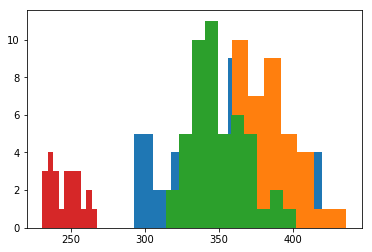

In [24]:
plt.hist(fixation_dataframe.query("(Training==False)&(Subject_ID=='S04')&(PRL_Position=='right')")['Mean_Fixation_Duration'])
plt.hist(fixation_dataframe.query("(Training==False)&(Subject_ID=='S04')&(PRL_Position=='left')")['Mean_Fixation_Duration'])
plt.hist(fixation_dataframe.query("(Training==False)&(Subject_ID=='S04')&(PRL_Position=='inferior')")['Mean_Fixation_Duration'])
plt.hist(fixation_dataframe.query("(Training==False)&(Subject_ID=='S04')&(PRL_Position=='Foveal')")['Mean_Fixation_Duration'])

Text(0.5, 1.0, 'Forward Saccades & PRL Position')

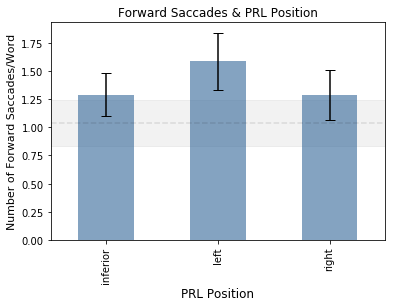

In [25]:
variable='fwd_per_word' #'Number_of_forward_Saccades'
forward_saccade_data=saccade_dataframe.query("(Training==False)& (PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=saccade_dataframe.query("(Training==False)& (PRL_Position!='Foveal')").groupby(['PRL_Position'])[variable].std()
#plt.figure(figsize=(15,15))
foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()

forward_saccade_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--',alpha=0.1)
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.05 )
plt.ylabel('Number of Forward Saccades/Word',size=11) #'Number of Forward Saccades')
plt.xlabel('PRL Position',size=12)
plt.title('Forward Saccades & PRL Position')

# savefig('Forward_saccades_prl_pos.tif',bbox_inches='tight')

Text(0.5, 1.0, 'Backward Saccades & PRL Position')

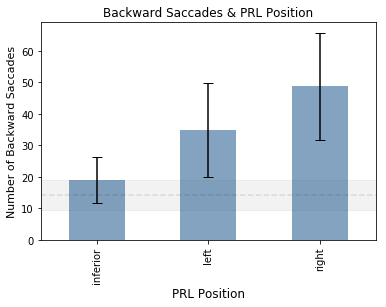

In [26]:
variable='Number_of_backward_Saccades'
backward_saccade_data=saccade_dataframe.query("(Training==False)&(PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=saccade_dataframe.query("(Training==False)").groupby(['PRL_Position'])[variable].std()
foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()

backward_saccade_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--',alpha=0.1)
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.05 )
plt.ylabel('Number of Backward Saccades',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Backward Saccades & PRL Position')

# savefig('Backward_saccades_prl_pos.tif',bbox_inches='tight')

In [27]:
error_bar

PRL_Position
Foveal       4.851625
inferior     7.341926
left        14.963718
right       17.011916
Name: Number_of_backward_Saccades, dtype: float64

Text(0.5, 1.0, 'Backward Saccades & PRL Position')

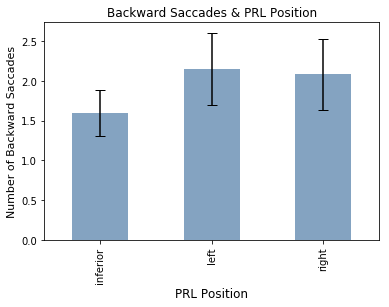

In [28]:
variable='saccades_per_word'
foveal_data=saccade_dataframe.query("(Training==False) & PRL_Position=='Foveal'").mean()[variable]
backward_saccade_data=saccade_dataframe.query("(Training==False) & PRL_Position!='Foveal'").groupby(['PRL_Position']).mean()[variable]#-foveal_data
error_bar=saccade_dataframe.query("(Training==False)").groupby(['PRL_Position'])[variable].std()#-foveal_data

backward_saccade_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.ylabel('Number of Backward Saccades',size=11)
#plt.ylim(0,0.7)
plt.xlabel('PRL Position',size=12)
plt.title('Backward Saccades & PRL Position')

#savefig('Backward_saccades_prl_pos.pdf',bbox_inches='tight')

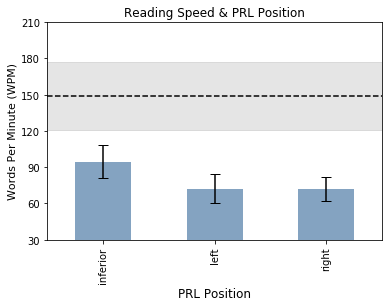

In [29]:
variable='wpm'
wpm_data=fixation_dataframe.query("(Training==False) & (PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=fixation_dataframe.query("(Training==False)& (PRL_Position!='Foveal')").groupby(['PRL_Position'])[variable].std()
foveal_mean=fixation_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=fixation_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()
wpm_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--')
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.1 )
plt.ylabel('Words Per Minute (WPM)',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Reading Speed & PRL Position')
plt.ylim(30,210)
plt.yticks((30,60,90,120,150,180,210))
savefig('Reading Speed Foveal Threshold Scaled.tiff',bbox_inches='tight')

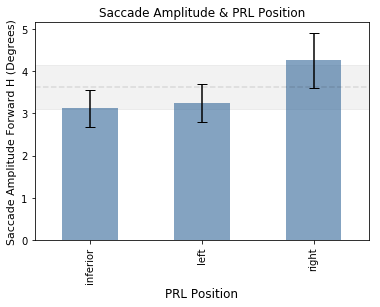

In [30]:
variable='Mean_Saccade_Amplitude_H_Forward'
#variable_std='SD_Saccade_Amplitude_H_Forward'
saccade_amplitude_H_data=saccade_dataframe.query("(Training==False)&(PRL_Position!='Foveal')").groupby(['PRL_Position']).mean()[variable]
error_bar=saccade_dataframe.query("(Training==False) & (PRL_Position!='Foveal')").groupby(['PRL_Position'])[variable].std()
foveal_mean=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')").mean()[variable]
foveal_std=saccade_dataframe.query("(Training==False) & (PRL_Position=='Foveal')")[variable].std()

saccade_amplitude_H_data.plot(kind='bar',yerr=error_bar,capsize=5,color=(0.2, 0.4, 0.6, 0.6))
plt.axhline(y=foveal_mean,color='k',linestyle='--',alpha=0.1)
plt.fill_between( [-10,10], [foveal_mean-foveal_std,foveal_mean-foveal_std],
                 [foveal_mean+foveal_std,foveal_mean+foveal_std], color='k',alpha=0.05 )
plt.ylabel('Saccade Amplitude Forward H (Degrees)',size=11)
plt.xlabel('PRL Position',size=12)
plt.title('Saccade Amplitude & PRL Position')

savefig('saccade_amplitude_forward.tif',bbox_inches='tight')

In [31]:
saccade_amplitude_H_data/0.05328848541023281

PRL_Position
inferior    58.601603
left        60.912678
right       80.022051
Name: Mean_Saccade_Amplitude_H_Forward, dtype: float64

In [32]:
import numpy as np
data_mean=saccade_dataframe.query(("Training==False")).groupby(['PRL_Position'])['Number_of_backward_Saccades'].mean()
data_std=saccade_dataframe.query(("Training==False")).groupby(['PRL_Position'])['Number_of_backward_Saccades'].std()
#data_std=np.std(data,axis=1)

In [33]:

saccade_dataframe.query(("Training==False")).groupby(['Presentation_Mode','Subject_ID','PRL_Position']).mean().to_csv('Sorted Data.txt')

In [34]:
import statsmodels.formula.api as smf

outcome_variable='accuracy_percent'
data=merged_df
no_highlight=merged_df.query("(Training==False) & (Presentation_Mode_x=='no highlight')")
with_highlight=merged_df.query("(Training==False) & (Presentation_Mode_x=='with highlight')")
md_no_h = smf.mixedlm("accuracy_percent ~ PRL_Position_x", no_highlight, groups=no_highlight["Subject_ID_x"])
md_w_h= smf.mixedlm("accuracy_percent ~ PRL_Position_x", with_highlight, groups=with_highlight["Subject_ID_x"])
mdf_no_h = md_no_h.fit()
mdf_w_h=md_w_h.fit()
print(mdf_no_h.summary())
print(mdf_w_h.summary())


               Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  accuracy_percent
No. Observations:    432      Method:              REML            
No. Groups:          6        Scale:               4.2317          
Min. group size:     72       Likelihood:          -933.2334       
Max. group size:     72       Converged:           Yes             
Mean group size:     72.0                                          
-------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept               98.464    0.475 207.363 0.000 97.533 99.395
PRL_Position_x[T.left]  -1.233    0.242  -5.087 0.000 -1.708 -0.758
PRL_Position_x[T.right] -0.605    0.242  -2.495 0.013 -1.080 -0.130
Group Var                1.177    0.382                            

               Mixed Linear Model Regression Results
Model:   

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data=fixation_dataframe
no_highlight=fixation_dataframe.query("(Training==False) & (Presentation_Mode=='no highlight')")
with_highlight=fixation_dataframe.query("(Training==False) & (Presentation_Mode=='with highlight')")
presentation_modes_combined=fixation_dataframe.query("(Training==False)")
md_no_h = smf.mixedlm("wpm ~ PRL_Position", no_highlight, groups=no_highlight["Subject_ID"])
md_w_h= smf.mixedlm("wpm ~ PRL_Position", with_highlight, groups=with_highlight["Subject_ID"])
md_all_ppt=smf.mixedlm("wpm ~ PRL_Position",presentation_modes_combined,groups=presentation_modes_combined["Subject_ID"])
mdf_no_h = md_no_h.fit()
mdf_w_h=md_w_h.fit()
mdf_all_ppt=md_all_ppt.fit()
print(mdf_no_h.summary())
print(mdf_w_h.summary())
print(mdf_all_ppt.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     wpm       
No. Observations:     432         Method:                 REML      
No. Groups:           6           Scale:                  103.4250  
Min. group size:      72          Likelihood:             -1620.4550
Max. group size:      72          Converged:              Yes       
Mean group size:      72.0                                          
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              91.725    3.184  28.812 0.000  85.485  97.965
PRL_Position[T.left]  -18.854    1.199 -15.731 0.000 -21.203 -16.505
PRL_Position[T.right] -18.111    1.199 -15.111 0.000 -20.460 -15.762
Group Var              56.503    3.624                              

               Mixed Linear Model Regression Resu

(0.9654802083969116, 2.219126145064365e-06)
(0.9559386968612671, 1.225106842639434e-07)
(0.9849774241447449, 0.004137572832405567)
   Subject_ID PRL_Position  Num_Fixations
0         S01     inferior     114.750000
1         S01        right     109.604167
2         S01         left     139.229167
3         S02     inferior      94.583333
4         S02        right     153.020833
5         S02         left     119.416667
6         S03     inferior     116.708333
7         S03        right     146.416667
8         S03         left     161.812500
9         S04     inferior      90.562500
10        S04        right     113.895833
11        S04         left     121.250000
12        S05     inferior      97.333333
13        S05        right     140.229167
14        S05         left     136.500000
15        S06     inferior      96.895833
16        S06        right     119.625000
17        S06         left     113.937500
                  Anova
             Num DF  Den DF F Value Pr > F
----

array([0.01363149, 0.01903196, 0.9       ])

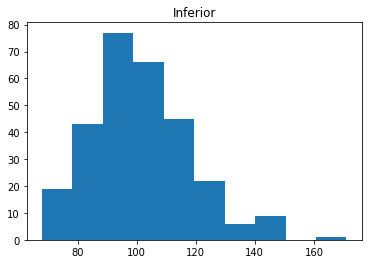

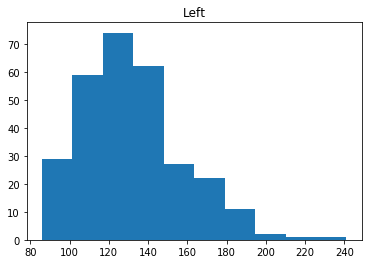

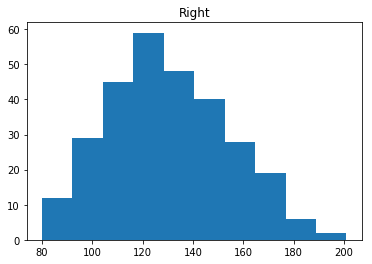

In [36]:
# First we check the normality of the distribution
from scipy.stats import shapiro
import numpy as np

fixation_df_measure='Num_Fixations' #Alter change the ANOVA measure

PRL_inferior=(fixation_dataframe.query("(Training==False) & (PRL_Position=='inferior')")[fixation_df_measure])
PRL_left=(fixation_dataframe.query("(Training==False) & (PRL_Position=='left')")[fixation_df_measure])
PRL_right=(fixation_dataframe.query("(Training==False) & (PRL_Position=='right')")[fixation_df_measure])
res_PRL_inferior=shapiro(PRL_inferior)
res_PRL_left=shapiro(PRL_left)
res_PRL_right=shapiro(PRL_right)

print(res_PRL_inferior)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(1)
plt.hist(fixation_dataframe.query("(Training==False) & (PRL_Position=='inferior')")[fixation_df_measure])
plt.title('Inferior')

#PRL Left is the only that does not satisfy normaly based 
#on SWILK test. Histogram shows a moderate to large position skew of data
print(res_PRL_left) 
# Now we plot to see if the parameters appear to also have a normal distribution
figure(2)
plt.hist(fixation_dataframe.query("(Training==False) & (PRL_Position=='left')")[fixation_df_measure])
plt.title('Left')

print(res_PRL_right)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(3)
plt.hist(fixation_dataframe.query("(Training==False) & (PRL_Position=='right')")[fixation_df_measure])
plt.title('Right')

#creating a pandas dataframe with a summary for each subject alone 
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
summary_df_fixation=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],str(fixation_df_measure):[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        mean_value=fixation_dataframe.query("(Subject_ID==@subject_id) & (Training==False) & (PRL_Position==@prl_pos)")[fixation_df_measure].mean()
        summary_df_fixation=summary_df_fixation.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,str(fixation_df_measure):mean_value},ignore_index=True)

#Now we display the summary dataframe
print(summary_df_fixation)

#Next we perform the ANOVA on the dataframe
from statsmodels.stats.anova import AnovaRM

data=summary_df_fixation
aovrm=AnovaRM(data,fixation_df_measure,'Subject_ID',within=["PRL_Position"])

res=aovrm.fit()

print(res)


#Followed by multiple comparison measures
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data[fixation_df_measure], data['PRL_Position'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

from statsmodels.stats.libqsturng import psturng
psturng(np.abs(result.meandiffs / result.std_pairs),len(result.groupsunique),result.df_total)

(0.99354088306427, 0.25359398126602173)
(0.9923307299613953, 0.14331604540348053)
(0.9818612337112427, 0.001027289661578834)
   Subject_ID PRL_Position  Mean_Saccade_Amplitude_H_Forward
0         S01     inferior                          2.738677
1         S01        right                          4.212993
2         S01         left                          3.445438
3         S02     inferior                          3.520453
4         S02        right                          5.173821
5         S02         left                          3.561186
6         S03     inferior                          2.820072
7         S03        right                          3.450407
8         S03         left                          3.293793
9         S04     inferior                          3.260884
10        S04        right                          3.970778
11        S04         left                          3.411611
12        S05     inferior                          2.941829
13        S05        

array([0.87407031, 0.00114452, 0.00299979])

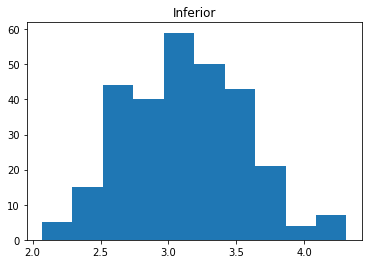

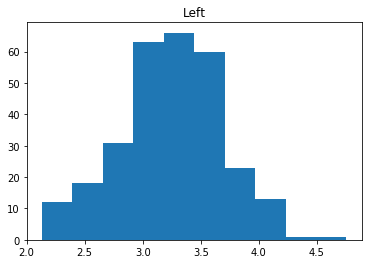

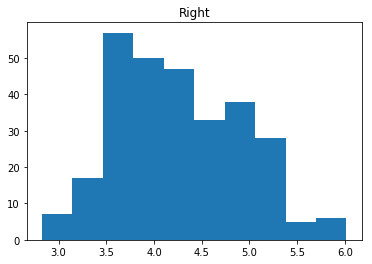

In [37]:
# First we check the normality of the distribution
from scipy.stats import shapiro
import numpy as np

saccade_df_measure='Mean_Saccade_Amplitude_H_Forward' #Alter change the ANOVA measure

PRL_inferior=(saccade_dataframe.query("(Training==False) & (PRL_Position=='inferior')")[saccade_df_measure])
PRL_left=(saccade_dataframe.query("(Training==False) & (PRL_Position=='left')")[saccade_df_measure])
PRL_right=(saccade_dataframe.query("(Training==False) & (PRL_Position=='right')")[saccade_df_measure])
res_PRL_inferior=shapiro(PRL_inferior)
res_PRL_left=shapiro(PRL_left)
res_PRL_right=shapiro(PRL_right)

print(res_PRL_inferior)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(1)
plt.hist(saccade_dataframe.query("(Training==False) & (PRL_Position=='inferior')")[saccade_df_measure])
plt.title('Inferior')

#PRL Left is the only that does not satisfy normaly based 
#on SWILK test. Histogram shows a moderate to large position skew of data
print(res_PRL_left) 
# Now we plot to see if the parameters appear to also have a normal distribution
figure(2)
plt.hist(saccade_dataframe.query("(Training==False) & (PRL_Position=='left')")[saccade_df_measure])
plt.title('Left')

print(res_PRL_right)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(3)
plt.hist(saccade_dataframe.query("(Training==False) & (PRL_Position=='right')")[saccade_df_measure])
plt.title('Right')

#creating a pandas dataframe with a summary for each subject alone 
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
summary_df_saccade=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],str(saccade_df_measure):[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        mean_value=saccade_dataframe.query("(Subject_ID==@subject_id) & (Training==False) & (PRL_Position==@prl_pos)")[saccade_df_measure].mean()
        summary_df_saccade=summary_df_saccade.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,str(saccade_df_measure):mean_value},ignore_index=True)

#Now we display the summary dataframe
print(summary_df_saccade)

#Next we perform the ANOVA on the dataframe
from statsmodels.stats.anova import AnovaRM

data=summary_df_saccade
aovrm=AnovaRM(data,saccade_df_measure,'Subject_ID',within=["PRL_Position"])

res=aovrm.fit()

print(res)


#Followed by multiple comparison measures
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data[saccade_df_measure], data['PRL_Position'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

from statsmodels.stats.libqsturng import psturng
psturng(np.abs(result.meandiffs / result.std_pairs),len(result.groupsunique),result.df_total)

(0.7281867265701294, 2.168321497662783e-21)
(0.8729835748672485, 1.071092812967439e-14)
(0.8637338280677795, 2.940577790896395e-15)
   Subject_ID PRL_Position  accuracy_percent
0         S01     inferior         99.213233
1         S01        right         98.887179
2         S01         left         99.318132
3         S02     inferior         98.755241
4         S02        right         98.459147
5         S02         left         97.909732
6         S03     inferior         98.175146
7         S03        right         97.432354
8         S03         left         95.968912
9         S04     inferior         99.189650
10        S04        right         96.446475
11        S04         left         97.137871
12        S05     inferior         98.218818
13        S05        right         97.823272
14        S05         left         93.884005
15        S06     inferior         99.429995
16        S06        right         98.763017
17        S06         left         99.347733
             

array([0.14784223, 0.53160243, 0.64185735])

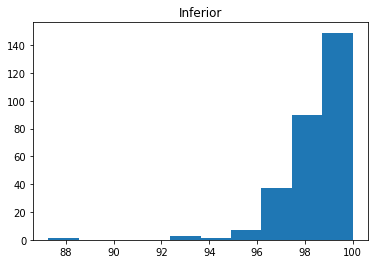

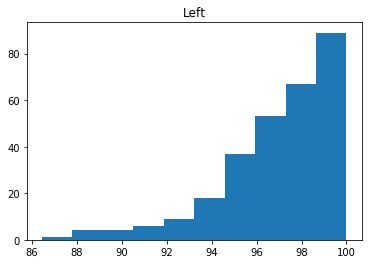

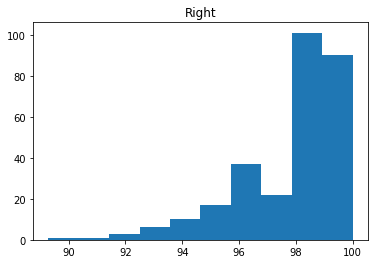

In [38]:
# First we check the normality of the distribution
from scipy.stats import shapiro
import numpy as np

merged_df_measure='accuracy_percent' #Alter change the ANOVA measure

PRL_inferior=(merged_df.query("(Training==False) & (PRL_Position_x=='inferior')")[merged_df_measure])
PRL_left=(merged_df.query("(Training==False) & (PRL_Position_x=='left')")[merged_df_measure])
PRL_right=(merged_df.query("(Training==False) & (PRL_Position_x=='right')")[merged_df_measure])
res_PRL_inferior=shapiro(PRL_inferior)
res_PRL_left=shapiro(PRL_left)
res_PRL_right=shapiro(PRL_right)

print(res_PRL_inferior)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(1)
plt.hist(merged_df.query("(Training==False) & (PRL_Position_x=='inferior')")[merged_df_measure])
plt.title('Inferior')

#PRL Left is the only that does not satisfy normaly based 
#on SWILK test. Histogram shows a moderate to large position skew of data
print(res_PRL_left) 
# Now we plot to see if the parameters appear to also have a normal distribution
figure(2)
plt.hist(merged_df.query("(Training==False) & (PRL_Position_x=='left')")[merged_df_measure])
plt.title('Left')

print(res_PRL_right)
# Now we plot to see if the parameters appear to also have a normal distribution
figure(3)
plt.hist(merged_df.query("(Training==False) & (PRL_Position_x=='right')")[merged_df_measure])
plt.title('Right')

#creating a pandas dataframe with a summary for each subject alone 
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
summary_df_accuracy=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],str(merged_df_measure):[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        mean_value=merged_df.query("(Subject_ID_x==@subject_id) & (Training==False) & (PRL_Position_x==@prl_pos)")[merged_df_measure].mean()
        summary_df_accuracy=summary_df_accuracy.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,str(merged_df_measure):mean_value},ignore_index=True)

#Now we display the summary dataframe
print(summary_df_accuracy)

#Next we perform the ANOVA on the dataframe
from statsmodels.stats.anova import AnovaRM

data=summary_df_accuracy
aovrm=AnovaRM(data,merged_df_measure,'Subject_ID',within=["PRL_Position"])

res=aovrm.fit()

print(res)


#Followed by multiple comparison measures
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data[merged_df_measure], data['PRL_Position'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

from statsmodels.stats.libqsturng import psturng
psturng(np.abs(result.meandiffs / result.std_pairs),len(result.groupsunique),result.df_total)

In [39]:
summary_df_fixation.to_csv(r'D:\KSP\Study\Houston\Projects\Reading Experiment\Reading Code\reading_analysis\expt2\reading_speed_summary.csv')

In [40]:
# First we check the normality of the distribution
from scipy.stats import shapiro
import numpy as np

PRL_inferior=(saccade_dataframe.query("(Training==False) & (PRL_Position=='inferior')")["fwd_per_word"])
PRL_left=(saccade_dataframe.query("(Training==False) & (PRL_Position=='left')")["fwd_per_word"])
PRL_right=(saccade_dataframe.query("(Training==False) & (PRL_Position=='right')")["fwd_per_word"])
res_PRL_inferior=shapiro(PRL_inferior)
res_PRL_left=shapiro(PRL_left)
res_PRL_right=shapiro(PRL_right)

print(res_PRL_inferior) # Shows mild positive skewness 
print(res_PRL_left)# 
print(res_PRL_right) # 

(0.9610503315925598, 5.50749689409713e-07)
(0.9791224598884583, 0.0003228348505217582)
(0.959398090839386, 3.349172175148851e-07)


(array([37., 55., 46., 43., 29., 32., 26., 12.,  4.,  4.]),
 array([0.94285714, 1.04167488, 1.14049261, 1.23931034, 1.33812808,
        1.43694581, 1.53576355, 1.63458128, 1.73339901, 1.83221675,
        1.93103448]),
 <a list of 10 Patch objects>)

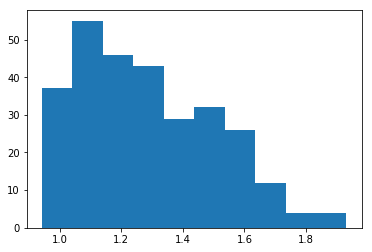

In [41]:
plt.hist(saccade_dataframe.query("(Training==False) & (PRL_Position=='right')")['fwd_per_word'])

In [42]:
#creating a pandas dataframe with a summary for each subject alone 
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
summary_df_saccades=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],'fwd_per_word':[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        num_saccades_mean=saccade_dataframe.query("(Subject_ID==@subject_id) & (Training==False) & (PRL_Position==@prl_pos)")['fwd_per_word'].mean()
        summary_df_saccades=summary_df_saccades.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,'fwd_per_word':num_saccades_mean},ignore_index=True)

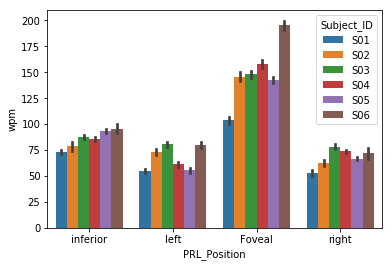

In [43]:
sns.barplot(x='PRL_Position',y='wpm',data=fixation_dataframe,hue='Subject_ID')

In [44]:
summary_df_saccades

Subject_ID PRL_Position  fwd_per_word
0         S01     inferior      1.470695
1         S01        right      1.120096
2         S01         left      1.626568
3         S02     inferior      1.178323
4         S02        right      1.450063
5         S02         left      1.522546
6         S03     inferior      1.506314
7         S03        right      1.604804
8         S03         left      1.871493
9         S04     inferior      1.125007
10        S04        right      1.218579
11        S04         left      1.424020
12        S05     inferior      1.292130
13        S05        right      1.260844
14        S05         left      1.761853
15        S06     inferior      1.170143
16        S06        right      1.079483
17        S06         left      1.329404

In [45]:
from statsmodels.stats.anova import AnovaRM

data=summary_df_saccades
aovrm=AnovaRM(data,'fwd_per_word','Subject_ID',within=["PRL_Position"])

res=aovrm.fit()

print(res)

                  Anova
             Num DF  Den DF F Value Pr > F
------------------------------------------
PRL_Position 2.0000 10.0000 12.0399 0.0022



In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['fwd_per_word'], data['PRL_Position'])
res = mc.tukeyhsd()
 
print(res)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
inferior  left   0.2989   0.0125  0.5853  True 
inferior right  -0.0015  -0.2878  0.2849 False 
  left   right  -0.3003  -0.5867 -0.0139  True 
-----------------------------------------------
['inferior' 'left' 'right']


In [47]:
from statsmodels.stats.libqsturng import psturng
psturng(np.abs(res.meandiffs / res.std_pairs),len(res.groupsunique),res.df_total)

array([0.04029385, 0.9       , 0.03928507])

In [48]:
subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
overall_duration_summary=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],'Overall_trial_duration':[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        overall_duration_per_subject=np.sum(fixation_dataframe.query("(Training==True) & (PRL_Position==@prl_pos)&(Subject_ID==@subject_id)")['Trial_Duration'])/60000
        overall_duration_summary=overall_duration_summary.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,'Overall_trial_duration':overall_duration_per_subject},ignore_index=True)
print(overall_duration_summary)
overall_duration_mean=overall_duration_summary['Overall_trial_duration'].mean()
overall_duration_mean_formatted='%0.2f Minutes'%(overall_duration_mean)
print(overall_duration_mean_formatted)

   Subject_ID PRL_Position  Overall_trial_duration
0         S01     inferior               54.733083
1         S01        right              105.093083
2         S01         left               74.571983
3         S02     inferior               58.505250
4         S02        right               75.150117
5         S02         left               58.334917
6         S03     inferior               41.013383
7         S03        right               43.972717
8         S03         left               43.540017
9         S04     inferior               45.602467
10        S04        right               49.512167
11        S04         left               66.791983
12        S05     inferior               39.774967
13        S05        right               54.611683
14        S05         left               76.593383
15        S06     inferior               45.817267
16        S06        right               54.045400
17        S06         left               49.460683
57.62 Minutes


In [49]:
# Now we compare the training effect by looking at the reading speeds:
#Start of training vs end of training
training_start=fixation_dataframe.query("(Training==True)")['wpm']

subject_list=["S01","S02","S03","S04","S05","S06"]
prl_list=["inferior","right","left"]
training_summary=pd.DataFrame({'Subject_ID':[],'PRL_Position':[],'Reading_speed_start':[],'Reading_speed_end':[],'Difference':[]})
for i in range(len(subject_list)):
    for j in range(len(prl_list)):
        subject_id=subject_list[i]
        prl_pos=prl_list[j]
        training_starting_performance=np.mean(fixation_dataframe.query("(Training==True) & (PRL_Position==@prl_pos)&(Subject_ID==@subject_id)")['wpm'].iloc[0:5])
        training_ending_performance=np.mean(fixation_dataframe.query("(Training==True) & (PRL_Position==@prl_pos)&(Subject_ID==@subject_id)")['wpm'].iloc[-5::])
        training_effect=training_ending_performance/training_starting_performance
        training_summary=training_summary.append({'Subject_ID':subject_id,'PRL_Position':prl_pos,'Reading_speed_start':training_starting_performance,'Reading_speed_end':training_ending_performance,'Difference':training_effect},ignore_index=True)
        
print(training_summary)
#training_start=np.mean()
training_ratio=np.mean(training_summary['Reading_speed_end'])/np.mean(training_summary['Reading_speed_start'])
print(training_ratio)

   Subject_ID PRL_Position  Reading_speed_start  Reading_speed_end  Difference
0         S01     inferior            74.136935          73.765475    0.994990
1         S01        right            30.525851          56.092920    1.837555
2         S01         left            53.319360          50.910021    0.954813
3         S02     inferior            72.585787          68.535820    0.944204
4         S02        right            42.066586          89.890247    2.136856
5         S02         left            40.944108          81.811684    1.998131
6         S03     inferior            69.218443          96.464816    1.393629
7         S03        right           100.352548          92.383466    0.920589
8         S03         left            72.943936          91.662619    1.256617
9         S04     inferior            75.379782          77.032830    1.021930
10        S04        right            80.979057          69.695492    0.860661
11        S04         left            52.777888     

In [50]:
np.std(training_summary['Difference'])

0.461113699288854

In [51]:
from scipy import stats

stats.ttest_rel(training_summary['Reading_speed_start'],training_summary['Reading_speed_end'], axis=0, nan_policy='propagate')



Ttest_relResult(statistic=-2.583342839592057, pvalue=0.019334270235427362)

In [52]:
import os
import pandas as pd
import tkinter as tk
from tkinter import filedialog
root = tk.Tk()
root.withdraw()
filedir_list=[]
data_directory=(r'D:\KSP\Study\Houston\Projects\Reading Experiment\reading data\reading\Results\Experiment 2 King Devick Mode\All Subjects\Raw Data')
for root,dirs,fils in os.walk(data_directory):
    filedir_list.append(root)
    
sweep_dataframe=pd.DataFrame({'Filename':[],'Subject_ID':[],'PRL_Position':[],'Presentation_Mode':[],'Line_Number':[],'Time Start':[],'Time End':[],'Saccade Duration':[],'Pos x(start)':[],'Pos y(start)':[],'Pos x(end)':[],'Pos y(end)':[],'Code':[]})
for path in filedir_list:
    for filename in os.listdir(path):
        if 'sweep_dataframe' in filename:
            if "inferior" in path.lower():
                prl_position='inferior'
            elif "left" in path.lower():
                prl_position='left'
            elif "right" in path.lower():
                prl_position='right'
            elif "foveal" in path.lower():
                prl_position='foveal'

            #identifies whether a word highlight was used or not
            if "guides" in path.lower():
                highlight='with highlight'
            elif "foveal" in path.lower():
                prl_position="foveal"
                highlight="N/A"
            else:
                highlight='no highlight'

            #identifies if it is a training session or main experiment
            if "training" in root.lower():
                continue
                
            sweep_data_path=os.path.join(path,filename)
            sweep_data=pd.read_csv(sweep_data_path,delimiter='\t',skiprows=0,index_col=False,error_bad_lines=False)
            for i in range (0,7):
                line_num=i+1
                subject_id=filename[filename.find('_S')+1:filename.find('_S')+4]
                trial_code='%s%s%s_Line%s'%(subject_id,'_',prl_position,line_num)
                sweep_dataframe=sweep_dataframe.append({'Filename':filename,'Subject_ID':subject_id,'PRL_Position':prl_position,'Presentation_Mode':highlight,'Line_Number':line_num,'Time Start':sweep_data.iloc[i,0],'Time End':sweep_data.iloc[i,1],'Saccade Duration':sweep_data.iloc[i,2],'Pos x(start)':sweep_data.iloc[i,3],'Pos y(start)':sweep_data.iloc[i,4],'Pos x(end)':sweep_data.iloc[i,5],'Pos y(end)':sweep_data.iloc[i,6],'Code':trial_code},ignore_index=True)


# filtered_df=sweep_dataframe[sweep_dataframe['Time Start']!=0 ]
# plot_df1=filtered_df.query("PRL_Position=='inferior'")['Pos x(end)']
# plot_df1=plot_df1[plot_df1<1024]

# plot_df2=filtered_df.query("PRL_Position=='foveal'")['Pos x(end)']
# plot_df2=plot_df2[plot_df2<1024]

# plot_df3=filtered_df.query("PRL_Position=='left'")['Pos x(end)']
# plot_df3=plot_df3[plot_df3<1024]

# plot_df4=filtered_df.query("PRL_Position=='right'")['Pos x(end)']
# plot_df4=plot_df4[plot_df4<1024]

# sns.distplot(plot_df1,color='yellow',label='inferior')
# # sns.distplot(plot_df2,color='grey',label='foveal')
# # sns.distplot(plot_df3,color='red',label='left')
# sns.distplot(plot_df4,color='green',label='right')

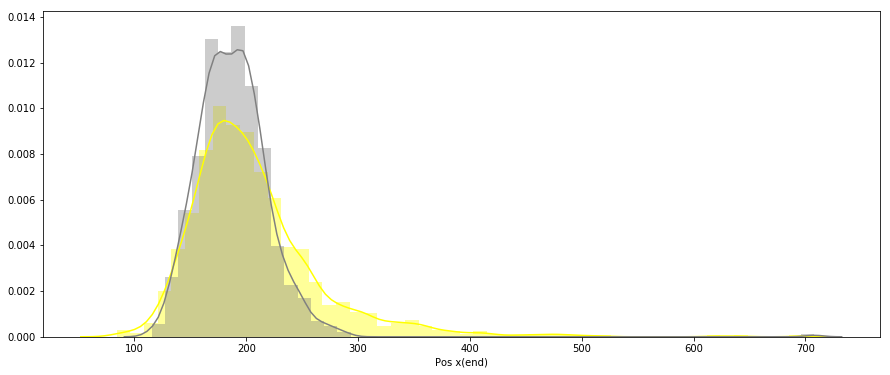

In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns
filtered_df=sweep_dataframe[sweep_dataframe['Time Start']!=0 ]
plot_df1=filtered_df.query("PRL_Position=='inferior'")['Pos x(end)']
plot_df1=plot_df1[plot_df1<1024]

plot_df2=filtered_df.query("PRL_Position=='foveal'")['Pos x(end)']
plot_df2=plot_df2[plot_df2<1024]

plot_df3=filtered_df.query("PRL_Position=='left'")['Pos x(end)']
plot_df3=plot_df3[plot_df3<1024]

plot_df4=filtered_df.query("PRL_Position=='right'")['Pos x(end)']
plot_df4=plot_df4[plot_df4<1024]

plt.figure(figsize=(15,6))
sns.distplot(plot_df1,color='yellow',label='inferior')
sns.distplot(plot_df2,color='grey',label='foveal')
# sns.distplot(plot_df3,color='red',label='left')
# sns.distplot(plot_df4,color='green',label='right')


(768, 0)

<Figure size 1080x432 with 0 Axes>

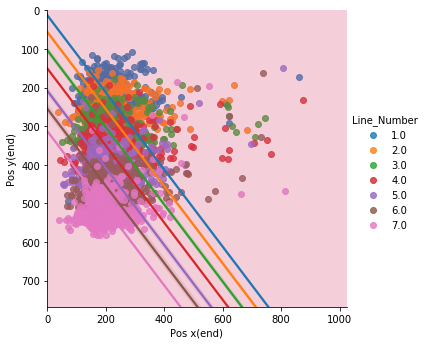

In [63]:
plt.figure(figsize=(15,6))
sns.lmplot(data=filtered_df,x='Pos x(end)',y='Pos y(end)',hue='Line_Number')
plt.xlim([0,1024])
plt.ylim([768,0])

(768, 0)

<Figure size 1080x432 with 0 Axes>

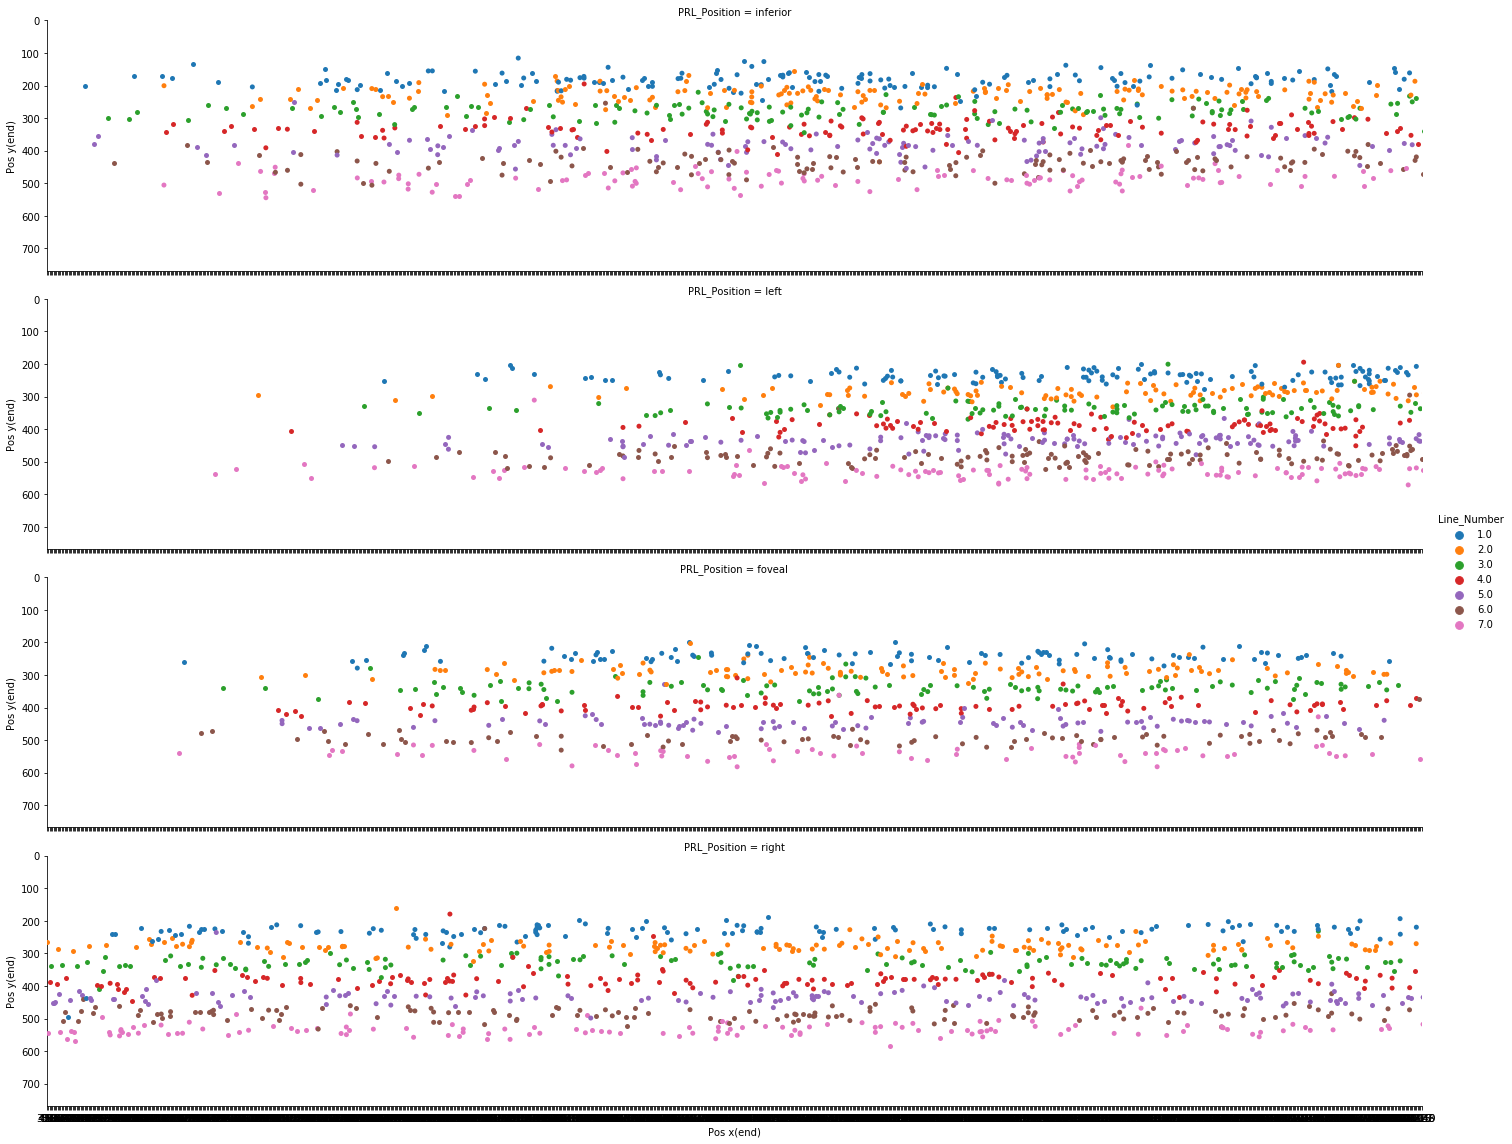

In [70]:
plt.figure(figsize=(15,6))
g=sns.catplot(x='Pos x(end)',y='Pos y(end)',data=filtered_df,row='PRL_Position',kind='strip',hue='Line_Number',height=4,aspect=5)
plt.xlim([0,1024])
plt.ylim([768,0])

In [55]:
from scipy.stats import iqr
print(iqr(plot_df1, axis=None, rng=(25, 75)))
print(iqr(plot_df2, axis=None, rng=(25, 75)))
print(iqr(plot_df3, axis=None, rng=(25, 75)))
print(iqr(plot_df4, axis=None, rng=(25, 75)))

57.5
39.099999999999994
65.1
66.6


(0, 768)

<Figure size 1080x432 with 0 Axes>

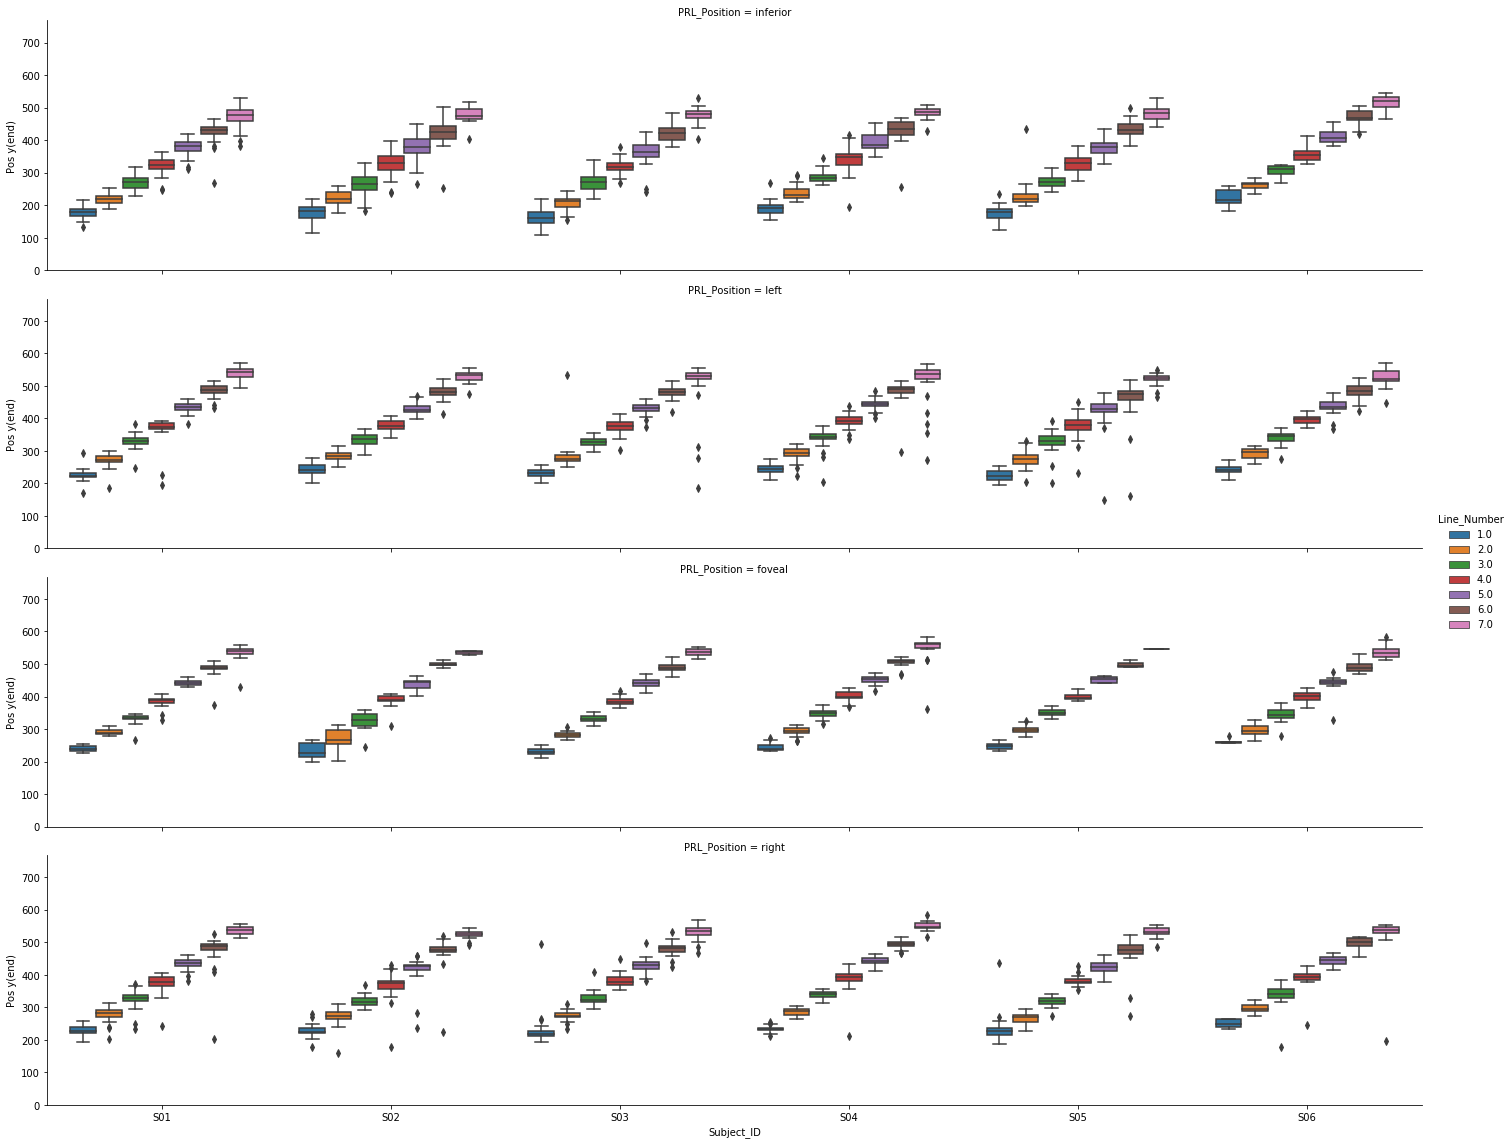

In [56]:
plt.figure(figsize=(15,6))
g=sns.catplot(x='Subject_ID',y='Pos y(end)',data=filtered_df,row='PRL_Position',kind='box',hue='Line_Number',height=4,aspect=5)
plt.ylim([0,768])

C:\Users\krish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0, 1024)

<Figure size 1080x432 with 0 Axes>

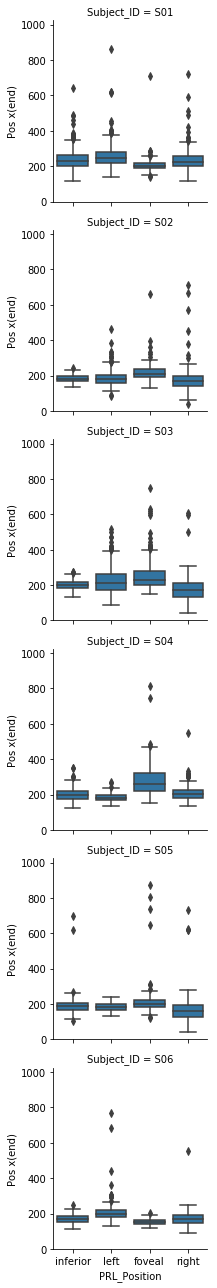

In [57]:
import seaborn as sns
plt.figure(figsize=(15,6))
g=sns.FacetGrid(filtered_df,row='Subject_ID')
g.map(sns.boxplot,"PRL_Position","Pos x(end)") #,hue='Line_Number')
plt.ylim([0,1024])
# plt.ylim([0,768])

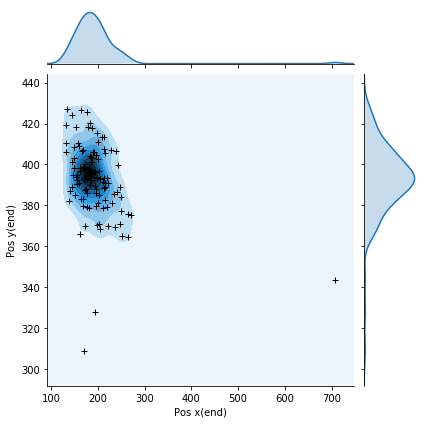

In [58]:
g=sns.jointplot(x="Pos x(end)", y="Pos y(end)", data=filtered_df.query("Line_Number==4  & PRL_Position=='foveal'"),kind='kde')
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker="+")


# plt.xlim([0,1024])
# plt.ylim([0,768])
# plt.gca().invert_yaxis()

In [59]:
# raw_data_file=open(r'F:\New Folder 2\demo2.txt')
# raw_data=raw_data_file.readlines()
# data_list=[]
# for i in range(len(raw_data)):
#     if 'SACC' in raw_data[i]:
#         continue
#     elif 'FIX' in raw_data[i]:
#         continue
#     elif 'MSG' in raw_data[i]:
#         continue
#     elif 'L' in raw_data[i]:
#         continue
#     elif '.\t' in raw_data[i]:
#         continue
#     else:
#         data_list.append(raw_data[i])


# data_df=pd.DataFrame(columns=['timestamp','x','y','pupildia','pupilarea','extra'], 
#                       data=[row.split() for row in data_list[1:]])

# data_df['x']=pd.to_numeric(data_df['x'])
# data_df['y']=pd.to_numeric(data_df['y'])

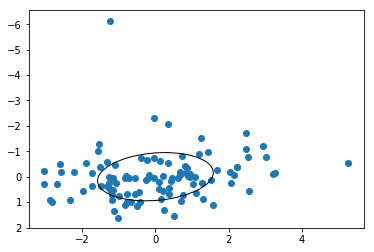

NameError: name 'pearsonr' is not defined

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn import preprocessing

screen_resolution_vertical=768
screen_resolution_horizontal=1024
diagonal_screensize_cm=50
distance_to_screen_cm=42
diagonal_pixel=np.sqrt(((screen_resolution_vertical)**2)+((screen_resolution_horizontal)**2))
pixel_per_cm=diagonal_pixel/diagonal_screensize_cm
degree_per_cm=(1/distance_to_screen_cm)* 180/np.pi
degrees_per_pixel=degree_per_cm/pixel_per_cm

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

x = filtered_df.query("Line_Number==5 & PRL_Position=='foveal'")['Pos x(end)']
x=((x-np.mean(x))*degrees_per_pixel)

y = filtered_df.query("Line_Number==5 & PRL_Position=='foveal'")['Pos y(end)']
y=((y-np.mean(y))*degrees_per_pixel)

nstd = 1  #2
ax = plt.subplot(111)

cov = np.cov(x, y)
vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * nstd * np.sqrt(vals)  #*2
ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=h,
              angle=theta, color='black')
ell.set_facecolor('none')
ax.add_artist(ell)
# plt.xlim([0,1024])
# plt.ylim([0,768])
plt.gca().invert_yaxis()
plt.scatter(x, y)
plt.show()
bcea=(2.291*np.pi*np.var(x)*np.var(y)*(np.sqrt(1-(pearsonr(x,y)[0])**2)))
print(bcea)

In [ ]:
np.var(y)

In [ ]:
# import tkinter as tk
# from tkinter import filedialog
# root = tk.Tk()
# root.withdraw()
# #filedir_list=[]
# data_directory=filedialog.askdirectory(title='Please select data directory')
# num_letters_dataframe=pd.DataFrame({'Filename':[],'PRL_Position':[],'Training':[],'Presentation_Mode':[],'Number_Letters':[],'Code':[]})
# num_letters_complete_list=[]
# for root,dirs,files in os.walk(data_directory):
#     for filename in os.listdir(root):
#         if 'reading_word_data' in filename:
#             if filename.endswith('.png'): 
#                 continue
#             else:
#                 if "inferior" in root.lower():
#                     prl_position='inferior'
#                 elif "left" in root.lower():
#                     prl_position='left'
#                 elif "right" in root.lower():
#                     prl_position='right'

#                 #identifies whether a word highlight was used or not
#                 if "guides" in root.lower():
#                     highlight='with highlight'
#                 elif "foveal" in root.lower():
#                     prl_position="foveal"
#                     highlight="N/A"
#                 else:
#                     highlight='no highlight'

#                 #identifies if it is a training session or main experiment
#                 if "training" in root.lower():
#                     training='True'
#                 else:
#                     training='False'
#                 word_data_path=os.path.join(root,filename)
#                 word_data=pd.read_csv(word_data_path,delimiter='\t')
#                 num_letters_list=[]
#                 for word_idx in range(len(word_data)):
#                     num_letters=len(word_data.iloc[word_idx,0])
#                     num_letters_list.append(num_letters)
#                 num_letters_trial=sum(num_letters_list)
#                 num_letters_complete_list.append(num_letters_trial)
#                 subject_id=filename[18:-8]
#                 trial_code='%s%s%s'%(subject_id,'_',prl_position)
#                 num_letters_dataframe=num_letters_dataframe.append({'Filename':filename,'PRL_Position':prl_position,'Training':training,'Presentation_Mode':highlight,'Number_Letters':num_letters_trial,'Code':trial_code},ignore_index=True)


In [ ]:
# fixation_copy=fixation_dataframe.copy()
# cols_to_use = num_letters_dataframe.columns.difference(fixation_dataframe.columns)
# dfNew = pd.merge(fixation_dataframe, num_letters_dataframe, left_on='Code', right_on='Code')
# dfNew = dfNew.drop('Filename_y', 1)
# dfNew = dfNew.drop('PRL_Position_y', 1)
# dfNew = dfNew.drop('Training_y', 1)
# dfNew = dfNew.drop('Presentation_Mode_y', 1)

In [ ]:
# dfNew['L/FS']=dfNew['Number_Letters']/dfNew['Num_Fixations']
# dfNew.query("PRL_Position_x=='right'")['L/FS'].mean()
# dfNew.query("PRL_Position_x=='left'")['L/FS'].std()